# Cloud Anomaly Dataset — Exploratory Data Analysis


In [ ]:
# Kernel setup note (no action needed)
# A virtual environment `.venv` and Jupyter kernel `ci-proj-venv` are installed.
# If you ever need to re-register the kernel, run in terminal:
#   python -m ipykernel install --user --name "ci-proj-venv" --display-name "Python (ci-proj-venv)"


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
# Plotting theme
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# Configure pandas display
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)

# Paths
DATA_PATH = Path("Cloud_Anomaly_Dataset.csv")
if not DATA_PATH.exists():
    raise FileNotFoundError(f"Dataset file not found at {DATA_PATH.resolve()}")

# Read CSV (robust)
try:
    df = pd.read_csv(DATA_PATH, low_memory=False)
except Exception as e:
    print("Standard read failed, retrying with latin-1 encoding...", e)
    df = pd.read_csv(DATA_PATH, encoding='latin-1', low_memory=False)

print("Loaded dataframe shape:", df.shape)
print("Columns:\n", df.columns.tolist())
print("\nInferred dtypes (head):\n", df.dtypes.head())

# Keep a pristine copy for reference
original_df = df.copy()

df.head()

Loaded dataframe shape: (277570, 13)
Columns:
 ['vm_id', 'timestamp', 'cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'num_executed_instructions', 'execution_time', 'energy_efficiency', 'task_type', 'task_priority', 'task_status', 'Anomaly status']

Inferred dtypes (head):
 vm_id               object
timestamp           object
cpu_usage          float64
memory_usage       float64
network_traffic    float64
dtype: object


vm_id         timestamp  cpu_usage  memory_usage  network_traffic  \
0  c5215826-6237-4a33-9312-72c1df909881  25-01-2023 09:10  54.881350     78.950861       164.775973   
1  29690bc6-1f34-403b-b509-a1ecb1834fb8  26-01-2023 04:46  71.518937     29.901883              NaN   
2  2e55abc3-5bad-46cb-b445-a577f5e9bf2a  13-01-2023 23:39        NaN     92.709195       203.674847   
3  ea8455b0-251c-4470-b7ea-8d40476e3434  14-01-2023 19:59  79.172504      2.972252       926.374030   
4  fd28310b-be6f-4320-a664-de02274993d9  18-01-2023 11:22  87.001215     46.620176       437.188115   

   power_consumption  num_executed_instructions  execution_time  energy_efficiency task_type task_priority  \
0         287.808986                     7527.0       69.345575           0.553589   network        medium   
1         362.273569                     5348.0       41.396040           0.349856        io          high   
2         231.467903                     5483.0       24.602549           0.796277        io        medium   
3         173.559325                     8644.0       55.702673           0.779499   compute        medium   
4          77.054702                     9427.0             NaN           0.207164       NaN           low   

  task_status  Anomaly status  
0     waiting               0  
1   completed               0  
2   completed               0  
3   completed               0  
4     waiting               0

In [ ]:
# Strip column names
df.columns = [c.strip() for c in df.columns]

In [ ]:
# Parse timestamp column
for ts_col in ["timestamp"]:
    if ts_col in df.columns:
        df[ts_col] = pd.to_datetime(df[ts_col], errors='coerce', dayfirst=True)
        break

In [ ]:
# Dataset Overview
print('Shape:', df.shape)
print('\nData Types:')
print(df.dtypes.value_counts())

print('\nFirst 5 rows:')
display(df.head())

print('\nTail 5 rows:')
display(df.tail())

print('\nDescriptive Statistics (Numeric):')
display(df.describe().T)

# Cardinality for object/category columns
obj_cols = [c for c in df.columns if df[c].dtype == 'object']
print('\nCategorical Cardinalities:')
for c in obj_cols[:20]:  # first 20
    print(f"{c}: {df[c].nunique()} unique values")

# Memory usage
print('\nMemory Usage (MB):', df.memory_usage(deep=True).sum() / (1024**2))

Shape: (277570, 13)

Data Types:
float64           7
object            4
datetime64[ns]    1
int64             1
Name: count, dtype: int64

First 5 rows:


vm_id           timestamp  cpu_usage  memory_usage  network_traffic  \
0  c5215826-6237-4a33-9312-72c1df909881 2023-01-25 09:10:00  54.881350     78.950861       164.775973   
1  29690bc6-1f34-403b-b509-a1ecb1834fb8 2023-01-26 04:46:00  71.518937     29.901883              NaN   
2  2e55abc3-5bad-46cb-b445-a577f5e9bf2a 2023-01-13 23:39:00        NaN     92.709195       203.674847   
3  ea8455b0-251c-4470-b7ea-8d40476e3434 2023-01-14 19:59:00  79.172504      2.972252       926.374030   
4  fd28310b-be6f-4320-a664-de02274993d9 2023-01-18 11:22:00  87.001215     46.620176       437.188115   

   power_consumption  num_executed_instructions  execution_time  energy_efficiency task_type task_priority  \
0         287.808986                     7527.0       69.345575           0.553589   network        medium   
1         362.273569                     5348.0       41.396040           0.349856        io          high   
2         231.467903                     5483.0       24.602549           0.796277        io        medium   
3         173.559325                     8644.0       55.702673           0.779499   compute        medium   
4          77.054702                     9427.0             NaN           0.207164       NaN           low   

  task_status  Anomaly status  
0     waiting               0  
1   completed               0  
2   completed               0  
3   completed               0  
4     waiting               0


Tail 5 rows:


vm_id           timestamp  cpu_usage  memory_usage  network_traffic  \
277565  c5334ec8-d0c7-4c7d-ad45-1550bcb87446 2023-01-31 19:28:00  83.918513     85.606782       545.610846   
277566  9bce6162-acea-4e26-9d9e-7a24c9c60b71 2023-01-11 18:24:00  12.172667     78.222272        72.425667   
277567  dc6bbd4b-f660-4085-917f-a8b8e84d1447 2023-01-14 20:35:00  63.527355     36.998653       407.818069   
277568  de72031d-ef09-4d5f-8730-99f068338490 2023-01-22 21:36:00  43.256174     50.937723       538.460617   
277569  89b1f28f-6134-4ba5-8e9f-8777ba43887a 2023-01-07 14:02:00  49.187027     37.051783        65.609313   

        power_consumption  num_executed_instructions  execution_time  energy_efficiency task_type task_priority  \
277565         369.996273                     6861.0       15.292729           0.157451   compute        medium   
277566                NaN                     1604.0       82.430493                NaN       NaN          high   
277567          14.016786                     9292.0       21.464536           0.247330   network        medium   
277568         280.242122                     9183.0       78.145239           0.308062        io        medium   
277569         124.150466                     1013.0        0.546173           0.380156       NaN        medium   

       task_status  Anomaly status  
277565     running               0  
277566     running               0  
277567     waiting               0  
277568     waiting               0  
277569     running               0


Descriptive Statistics (Numeric):


count                           mean                  min                  25%  \
timestamp                    277570  2023-01-16 11:41:01.653637120  2023-01-01 00:00:00  2023-01-08 17:10:00   
cpu_usage                  250130.0                      50.013258             0.000071            24.880023   
memory_usage               249775.0                      49.967249             0.000016            24.965105   
network_traffic            249725.0                     500.554083             0.002542           250.298114   
power_consumption          250018.0                     249.987238             0.000802           124.199907   
num_executed_instructions  249637.0                    5002.490284                  0.0               2506.0   
execution_time             249960.0                      50.011964             0.000172            25.098016   
energy_efficiency          249616.0                       0.500369             0.000004             0.250375   
Anomaly status             277570.0                       0.059999                  0.0                  0.0   

                                           50%                  75%                  max          std  
timestamp                  2023-01-16 11:24:00  2023-01-24 06:12:00  2023-01-31 23:59:00          NaN  
cpu_usage                            50.023806            75.097896            99.999171    28.895806  
memory_usage                         49.912051            74.960052            99.999907     28.87909  
network_traffic                     500.736963           750.720026           999.998686   288.787794  
power_consumption                   250.397212           375.485305           499.998819   144.662676  
num_executed_instructions               5000.0               7499.0               9999.0  2882.806422  
execution_time                       50.005593            75.043715            99.998831    28.837634  
energy_efficiency                     0.500834             0.750112             0.999994     0.288547  
Anomaly status                             0.0                  0.0                  1.0     0.237486


Categorical Cardinalities:
vm_id: 249595 unique values
task_type: 3 unique values
task_priority: 3 unique values
task_status: 3 unique values

Memory Usage (MB): 81.8233232498169


In [ ]:
#choose target variable
TARGET_COL = 'Anomaly status' if 'Anomaly status' in df.columns else None
if TARGET_COL:
    target_col = TARGET_COL
    print('Using target column:', target_col)
    # If object labels, try to map to binary
    if df[target_col].dtype == 'object':
        mapping = {"anomaly":1, "anomalous":1, "yes":1, "true":1, "1":1,
                   "normal":0, "no":0, "false":0, "0":0}
        lower = df[target_col].astype(str).str.lower().str.strip()
        bin_series = lower.map(mapping)
        if bin_series.isna().all():
            print('Could not map textual labels; keeping original target.')
        else:
            df['_anomaly_flag'] = bin_series.fillna(0).astype(int)
    elif pd.api.types.is_numeric_dtype(df[target_col]):
        uniq = sorted(pd.Series(df[target_col].dropna().unique()).tolist())
        if set(uniq).issubset({0,1}):
            df['_anomaly_flag'] = np.where(df[target_col].fillna(0) != 0, 1, 0).astype(int)
        else:
            # Heuristic: non-zero as anomaly if zeros dominate
            if (df[target_col] == 0).mean() > 0.5:
                df['_anomaly_flag'] = (df[target_col].fillna(0) != 0).astype(int)
            else:
                print('Numeric target appears non-binary; not forcing a flag.')
else:
    target_col = None
    print('No explicit target column found.')


Using target column: Anomaly status


In [ ]:

# Basic type hints for numerics cast from object (safe, optional)
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            converted = pd.to_numeric(df[col])
            # If conversion creates many NaNs, skip
            if converted.isna().mean() < 0.05:
                df[col] = converted
        except Exception:
            pass

print('Rows:', len(df), '| Columns:', df.shape[1])
if '_anomaly_flag' in df.columns:
    print('Anomaly flag distribution:\n', df['_anomaly_flag'].value_counts())

Rows: 277570 | Columns: 14
Anomaly flag distribution:
 _anomaly_flag
0    260916
1     16654
Name: count, dtype: int64


Missing Values (top 30):


missing_count  missing_pct
task_type                          27990    10.083943
vm_id                              27975    10.078539
energy_efficiency                  27954    10.070973
task_status                        27949    10.069172
num_executed_instructions          27933    10.063407
task_priority                      27896    10.050077
network_traffic                    27845    10.031704
memory_usage                       27795    10.013690
execution_time                     27610     9.947040
power_consumption                  27552     9.926145
cpu_usage                          27440     9.885795
timestamp                              0     0.000000
Anomaly status                         0     0.000000
_anomaly_flag                          0     0.000000


Total duplicate rows: 0
Shape after duplicate removal (not applied to df): (277570, 14)

Columns with >60% missing: []


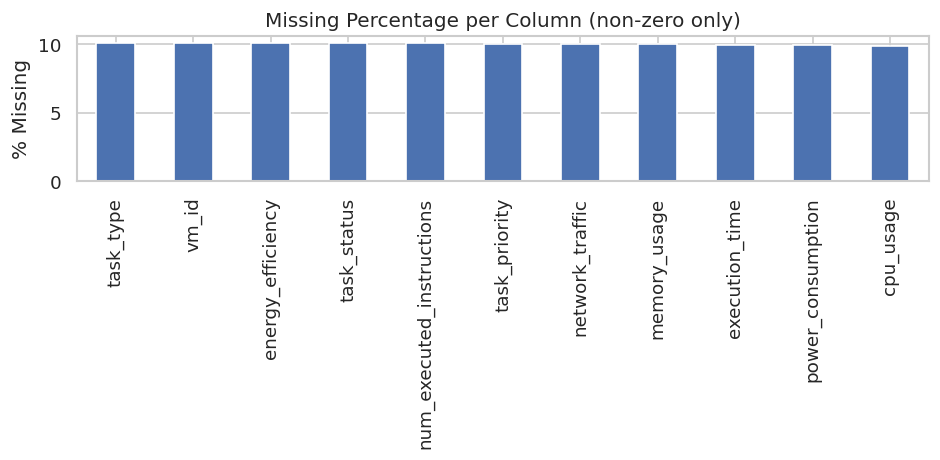

In [ ]:
# Missing & Duplicate Values Analysis
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({'missing_count': missing_counts, 'missing_pct': missing_pct})
print('Missing Values (top 30):')
display(missing_df.head(30))

print('\nTotal duplicate rows:', df.duplicated().sum())

# Optionally drop fully duplicate rows for downstream analysis (not modifying original yet)
df_no_dupes = df.drop_duplicates()
print('Shape after duplicate removal (not applied to df):', df_no_dupes.shape)

# High-missing columns for potential dropping threshold (e.g., > 60%)
high_missing = missing_df[missing_df['missing_pct'] > 60].index.tolist()
print('\nColumns with >60% missing:', high_missing)

# Simple Missing Pattern Visualization (requires seaborn)
plt.figure(figsize=(8, 4))
missing_pct[missing_pct > 0].plot(kind='bar')
plt.ylabel('% Missing')
plt.title('Missing Percentage per Column (non-zero only)')
plt.tight_layout()
plt.show()

In [ ]:
# Basic Anomaly Profiling (if target/anomaly column exists)
if target_col and target_col in df.columns:
    print(f'Profiling anomalies using target column: {target_col}')
    # Assume binary: 1/True indicates anomaly if possible
    # Normalize to binary flags
    tc = df[target_col]
    if tc.dtype == 'object':
        # Map common anomaly labels
        mapping = {"anomaly":1, "normal":0, "yes":1, "no":0, "true":1, "false":0}
        tc_lower = tc.str.lower()
        bin_series = tc_lower.map(mapping)
        if bin_series.isna().all():
            print('Could not map object labels to anomaly flags; skipping detailed profiling.')
        else:
            df['_anomaly_flag'] = bin_series.fillna(0).astype(int)
    elif pd.api.types.is_numeric_dtype(tc):
        # Heuristic: treat non-zero as anomaly if many zeros present
        if (tc == 0).mean() > 0.5:
            df['_anomaly_flag'] = (tc != 0).astype(int)
        else:
            # Use as-is but cap values to {0,1} if only those two unique
            unique_vals = sorted(tc.dropna().unique().tolist())
            if set(unique_vals).issubset({0,1}):
                df['_anomaly_flag'] = tc.astype(int)
            else:
                # Multi-class -> skip flag creation
                print('Numeric target seems multi-class; skipping binary anomaly flag creation.')
    else:
        print('Unsupported dtype for anomaly profiling.')

    if '_anomaly_flag' in df.columns:
        print('\nAnomaly flag distribution:')
        print(df['_anomaly_flag'].value_counts())
        # Compare means of numeric columns
        numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
        anomaly_group_stats = df.groupby('_anomaly_flag')[numeric_cols].mean().T
        anomaly_group_stats.columns = ['normal_mean', 'anomaly_mean'] if 0 in anomaly_group_stats.columns else anomaly_group_stats.columns
        display(anomaly_group_stats.head(25))

        # Simple feature importance proxy (RandomForest) if binary flag created
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import classification_report

        feature_df = df[numeric_cols].select_dtypes(include=[np.number]).fillna(0)
        y = df['_anomaly_flag']
        if y.nunique() == 2:
            X_train, X_test, y_train, y_test = train_test_split(feature_df, y, test_size=0.3, random_state=42, stratify=y)
            rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            print('\nRandomForest Classification Report:')
            print(classification_report(y_test, y_pred))
            importances = pd.Series(rf.feature_importances_, index=feature_df.columns).sort_values(ascending=False)
            print('Top 15 Feature Importances:')
            display(importances.head(15))
        else:
            print('Anomaly flag is not binary; skipping RandomForest importance.')
else:
    print('No clear anomaly/target column found; skipping profiling.')

Profiling anomalies using target column: Anomaly status

Anomaly flag distribution:
_anomaly_flag
0    260916
1     16654
Name: count, dtype: int64


normal_mean  anomaly_mean
cpu_usage                    49.999685     50.237193
memory_usage                 49.993422     49.559217
network_traffic             497.618447    546.345718
power_consumption           249.984062    250.036876
num_executed_instructions  5001.416342   5019.294145
execution_time               50.020443     49.871339
energy_efficiency             0.516844      0.261219
Anomaly status                0.000000      1.000000
_anomaly_flag                 0.000000      1.000000


RandomForest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78275
           1       1.00      1.00      1.00      4996

    accuracy                           1.00     83271
   macro avg       1.00      1.00      1.00     83271
weighted avg       1.00      1.00      1.00     83271

Top 15 Feature Importances:


Anomaly status               0.509160
_anomaly_flag                0.477404
energy_efficiency            0.010862
network_traffic              0.002128
execution_time               0.000203
cpu_usage                    0.000183
memory_usage                 0.000041
num_executed_instructions    0.000010
power_consumption            0.000009
dtype: float64

Total numeric columns: 9


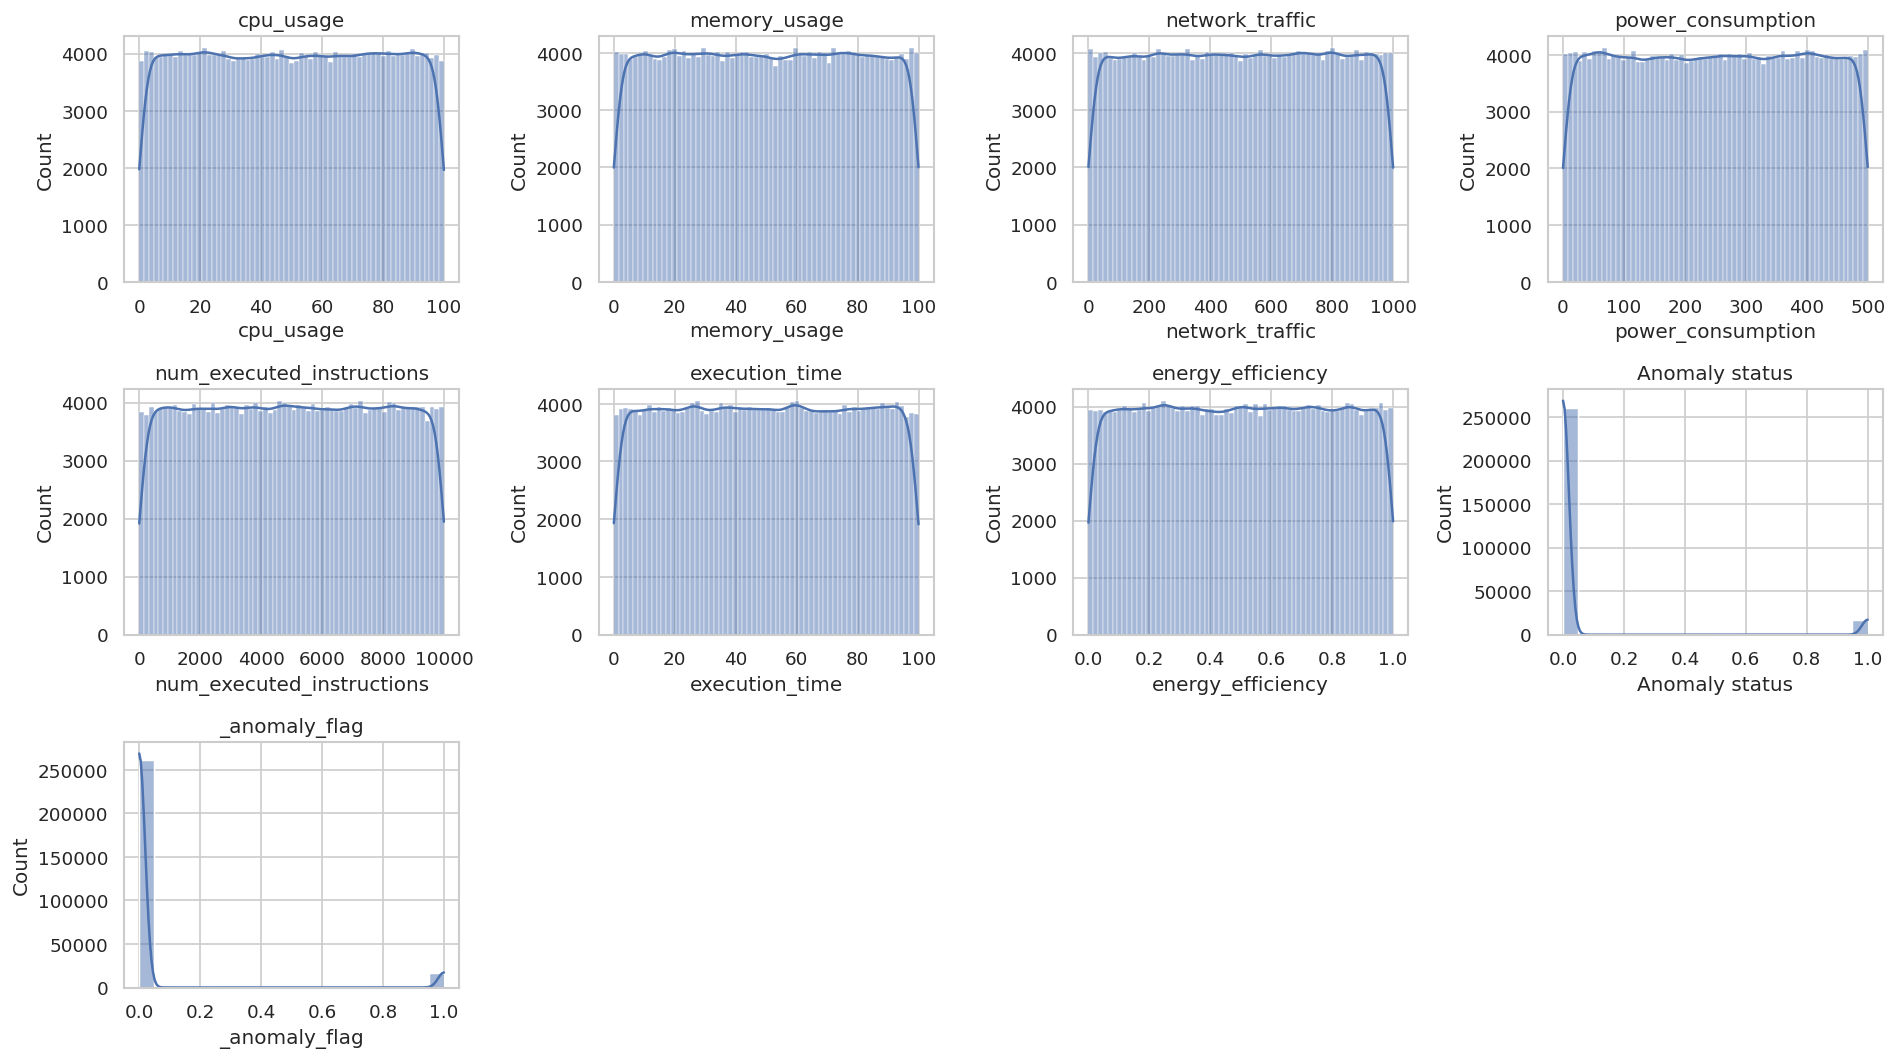


Value counts for task_type:
task_type
io         83513
network    83253
compute    82814
Name: count, dtype: int64

Value counts for task_priority:
task_priority
low       83373
high      83186
medium    83115
Name: count, dtype: int64

Value counts for task_status:
task_status
waiting      83544
running      83059
completed    83018
Name: count, dtype: int64


In [ ]:
# Univariate Distributions
numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
print(f'Total numeric columns: {len(numeric_cols)}')

# Plot histograms (sample up to 12 numeric columns for readability)
sample_numeric = numeric_cols[:12]
fig, axes = plt.subplots(nrows=int(np.ceil(len(sample_numeric)/4)), ncols=4, figsize=(16, 3*int(np.ceil(len(sample_numeric)/4))))
axes = axes.flatten()
for ax, col in zip(axes, sample_numeric):
    sns.histplot(df[col].dropna(), kde=True, ax=ax)
    ax.set_title(col)
for ax in axes[len(sample_numeric):]:
    ax.remove()
plt.tight_layout()
plt.show()

# Value counts for small-cardinality categorical columns
small_cat_cols = [c for c in df.columns if df[c].dtype == 'object' and df[c].nunique() <= 15]
for c in small_cat_cols[:10]:
    print(f'\nValue counts for {c}:')
    print(df[c].value_counts())

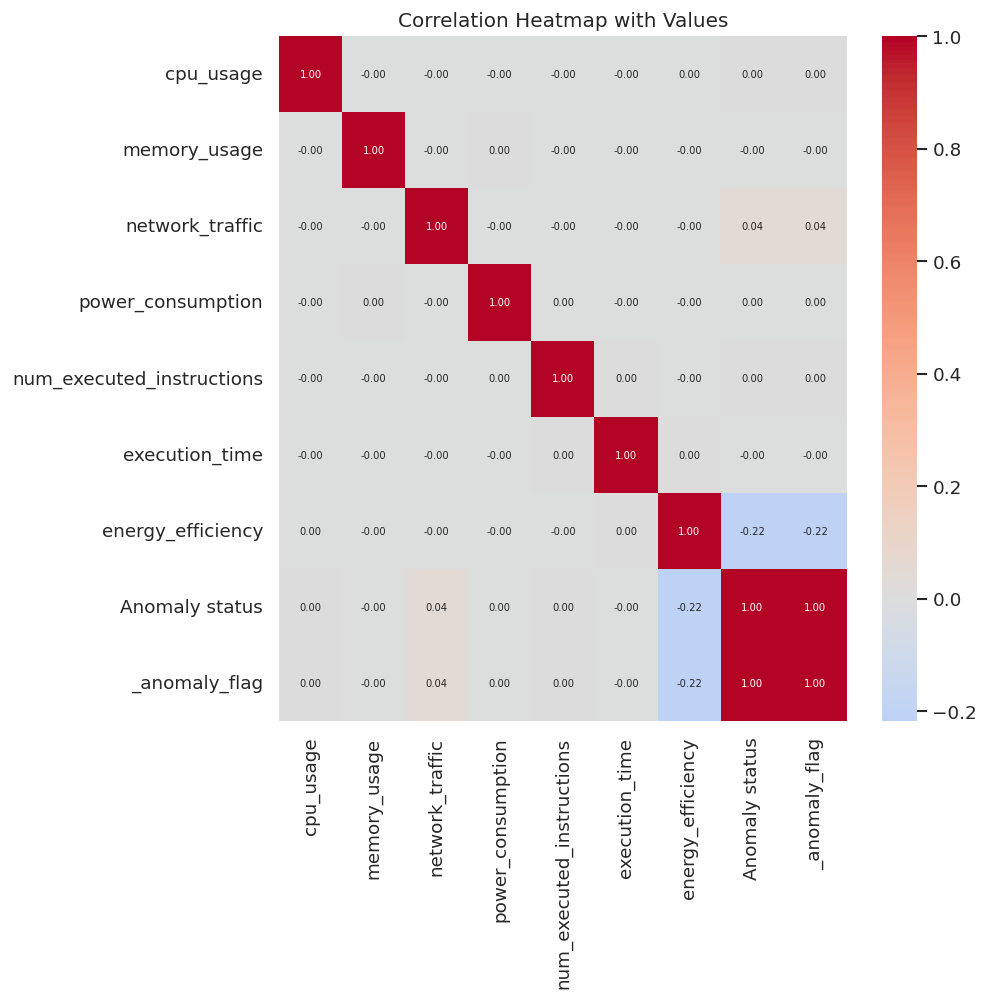

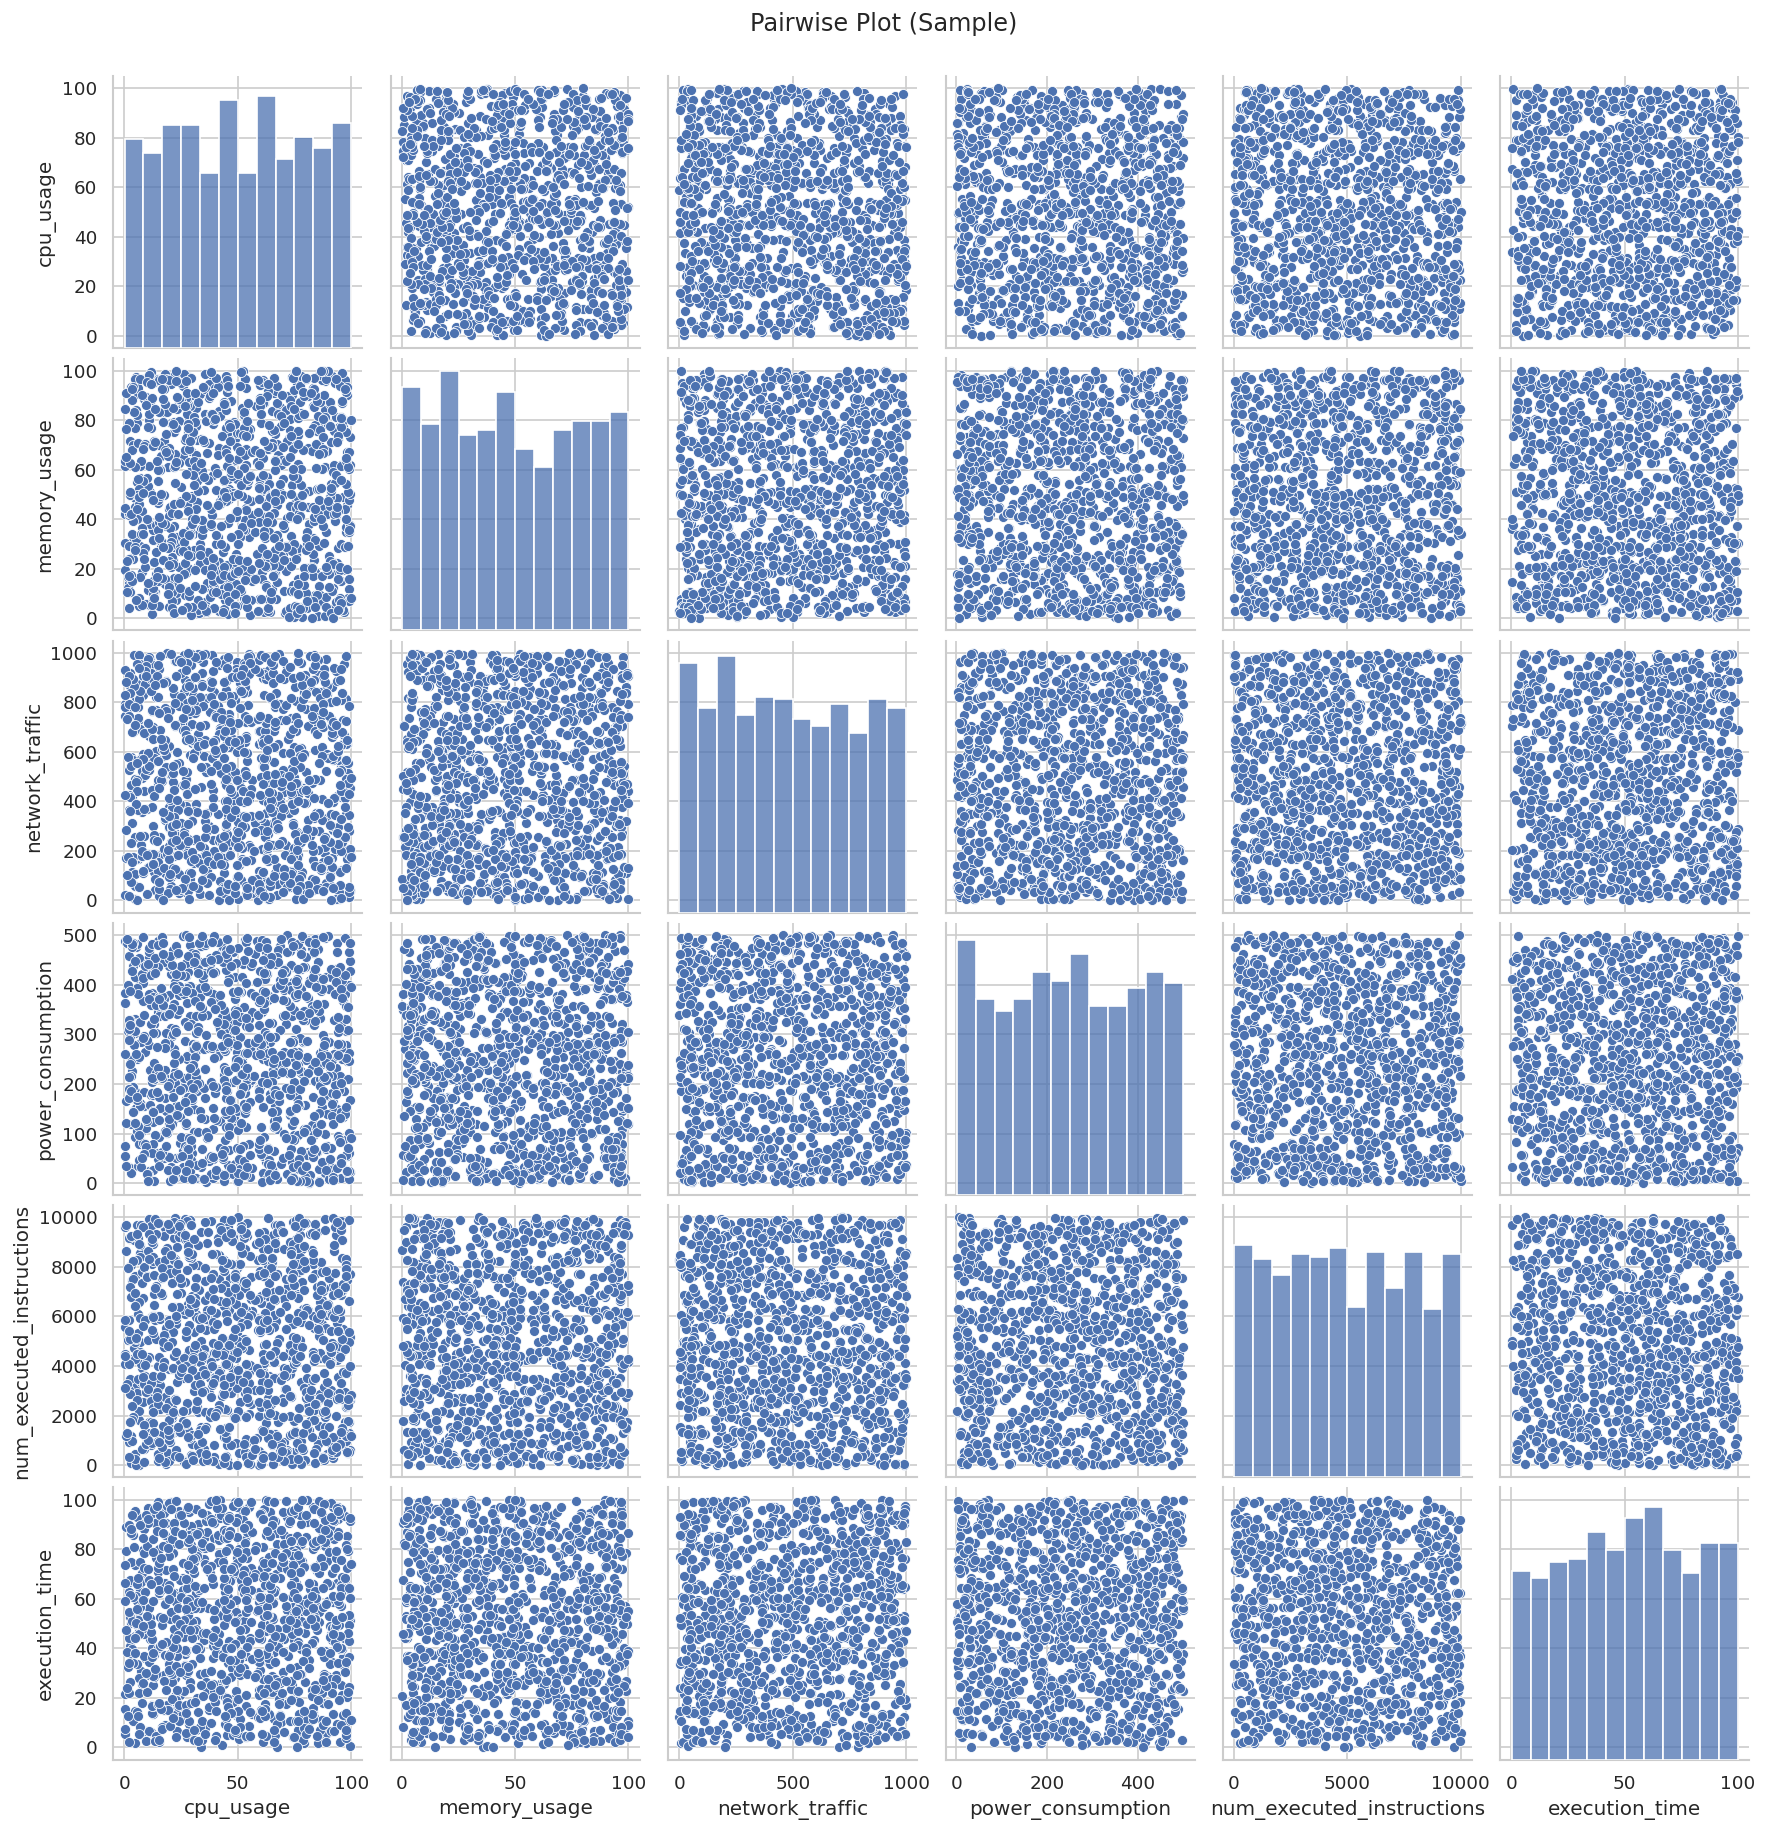

Correlation with numeric target:


Anomaly status               1.000000
_anomaly_flag                1.000000
energy_efficiency           -0.217539
network_traffic              0.040148
memory_usage                -0.003578
cpu_usage                    0.001908
num_executed_instructions    0.001474
execution_time              -0.001197
power_consumption            0.000087
Name: Anomaly status, dtype: float64

In [ ]:
# Correlation & Pairwise Relationships

# Compute correlation matrix for numeric columns
numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
corr_df = df[numeric_cols].corr(method='pearson')

# Heatmap with correlation values displayed
plt.figure(figsize=(min(0.5*len(numeric_cols)+4, 18), min(0.5*len(numeric_cols)+4, 18)))
sns.heatmap(
    corr_df,
    cmap='coolwarm',
    center=0,
    annot=True,          # <<< Added annotation for numbers
    fmt=".2f",           # <<< Show values up to 2 decimal places
    annot_kws={"size": 6}   # <<< Optional: small text for readability
)
plt.title('Correlation Heatmap with Values')
plt.tight_layout()
plt.show()

# Pairplot (sampled if dataset is large) – limit to first 6 numeric columns
pairplot_cols = numeric_cols[:6]

if len(df) > 5000:
    sample_df = df[pairplot_cols].sample(2000, random_state=42)
else:
    sample_df = df[pairplot_cols]

if pairplot_cols:
    sns.pairplot(sample_df.dropna())
    plt.suptitle('Pairwise Plot (Sample)', y=1.02)
    plt.show()

# Correlation with target column or anomaly flag
if 'target_col' in globals() and target_col and target_col in df.columns and pd.api.types.is_numeric_dtype(df[target_col]):
    print('Correlation with numeric target:')
    display(corr_df[target_col].sort_values(key=lambda s: s.abs(), ascending=False))

elif '_anomaly_flag' in df.columns:
    print('Correlation with anomaly flag:')
    display(df[numeric_cols + ['_anomaly_flag']]
            .corr()['_anomaly_flag']
            .sort_values(key=lambda s: s.abs(), ascending=False))


Outlier counts (top 20 by %):


column          iqr        lower         upper  outlier_count  outlier_pct
7             Anomaly status     0.000000     0.000000      0.000000          16654     5.999928
8              _anomaly_flag     0.000000     0.000000      0.000000          16654     5.999928
0                  cpu_usage    50.217873   -50.446787    150.424706              0     0.000000
1               memory_usage    49.994947   -50.027314    149.952472              0     0.000000
2            network_traffic   500.421912  -500.334755   1501.352894              0     0.000000
4  num_executed_instructions  4993.000000 -4983.500000  14988.500000              0     0.000000
3          power_consumption   251.285398  -252.728191    752.413403              0     0.000000
6          energy_efficiency     0.499737    -0.499230      1.499716              0     0.000000
5             execution_time    49.945699   -49.820533    149.962263              0     0.000000

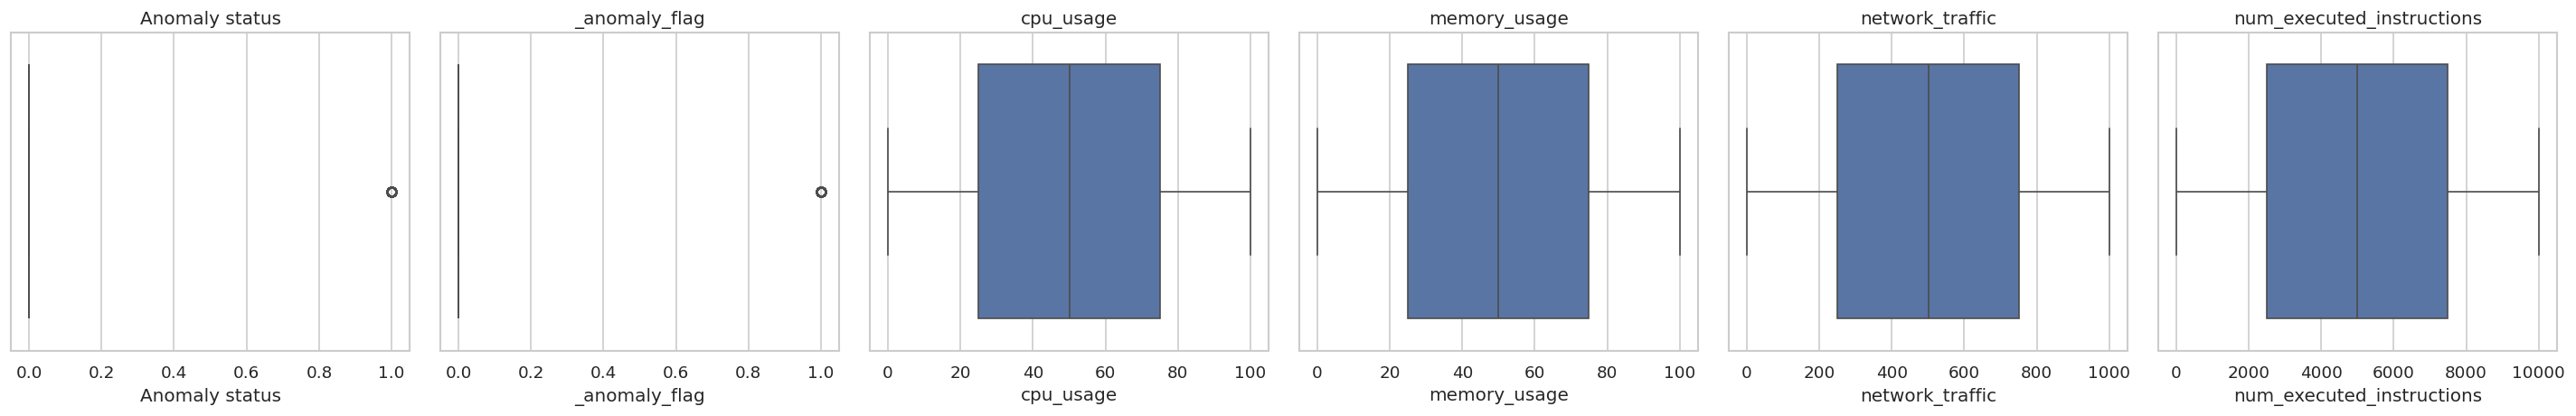

In [ ]:
# Outlier Detection (IQR Method)
outlier_summary = []
for col in numeric_cols:
    series = df[col].dropna()
    if series.empty: continue
    q1, q3 = np.percentile(series, [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((series < lower) | (series > upper)).sum()
    pct = outliers / len(series) * 100
    outlier_summary.append({'column': col, 'iqr': iqr, 'lower': lower, 'upper': upper, 'outlier_count': outliers, 'outlier_pct': pct})

outlier_df = pd.DataFrame(outlier_summary).sort_values('outlier_pct', ascending=False)
print('Outlier counts (top 20 by %):')
display(outlier_df.head(20))

# Boxplots for top 6 columns with highest outlier %
box_cols = outlier_df.head(6)['column'].tolist()
fig, axes = plt.subplots(nrows=1, ncols=len(box_cols), figsize=(4*len(box_cols), 4))
if len(box_cols) == 1:
    axes = [axes]
for ax, col in zip(axes, box_cols):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

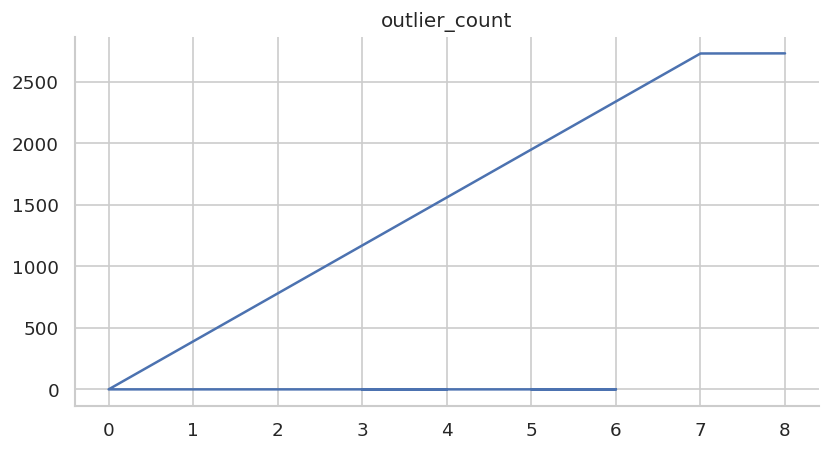

In [ ]:
from matplotlib import pyplot as plt
_df_11['outlier_count'].plot(kind='line', figsize=(8, 4), title='outlier_count')
plt.gca().spines[['top', 'right']].set_visible(False)

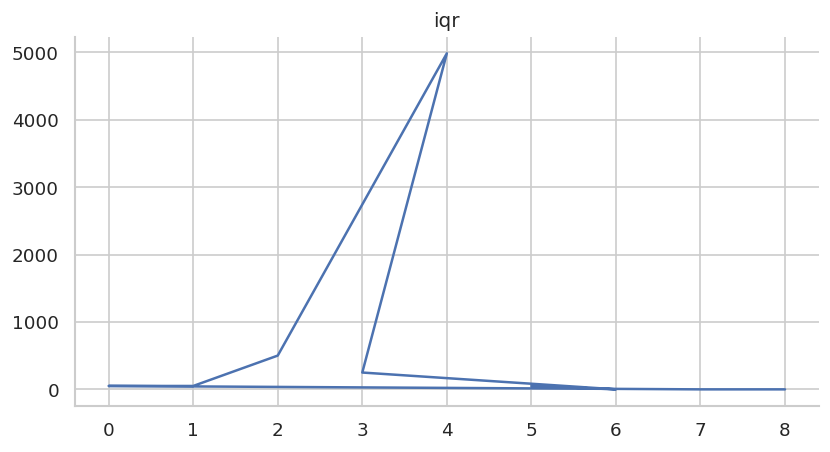

In [ ]:
from matplotlib import pyplot as plt
_df_8['iqr'].plot(kind='line', figsize=(8, 4), title='iqr')
plt.gca().spines[['top', 'right']].set_visible(False)

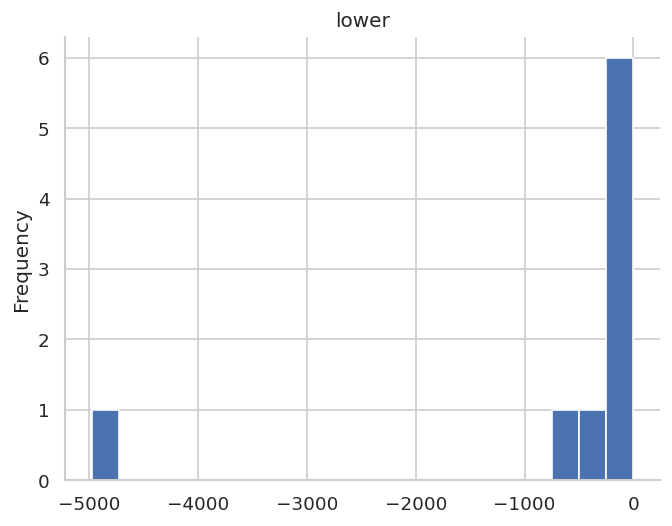

In [ ]:
from matplotlib import pyplot as plt
_df_1['lower'].plot(kind='hist', bins=20, title='lower')
plt.gca().spines[['top', 'right',]].set_visible(False)

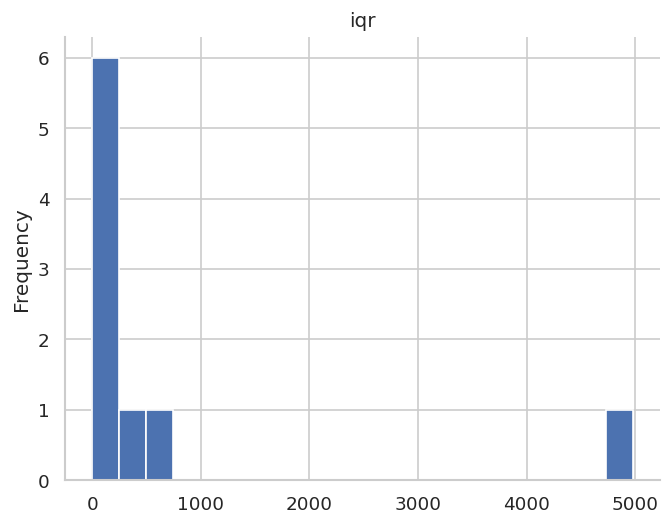

In [ ]:
from matplotlib import pyplot as plt
_df_0['iqr'].plot(kind='hist', bins=20, title='iqr')
plt.gca().spines[['top', 'right',]].set_visible(False)

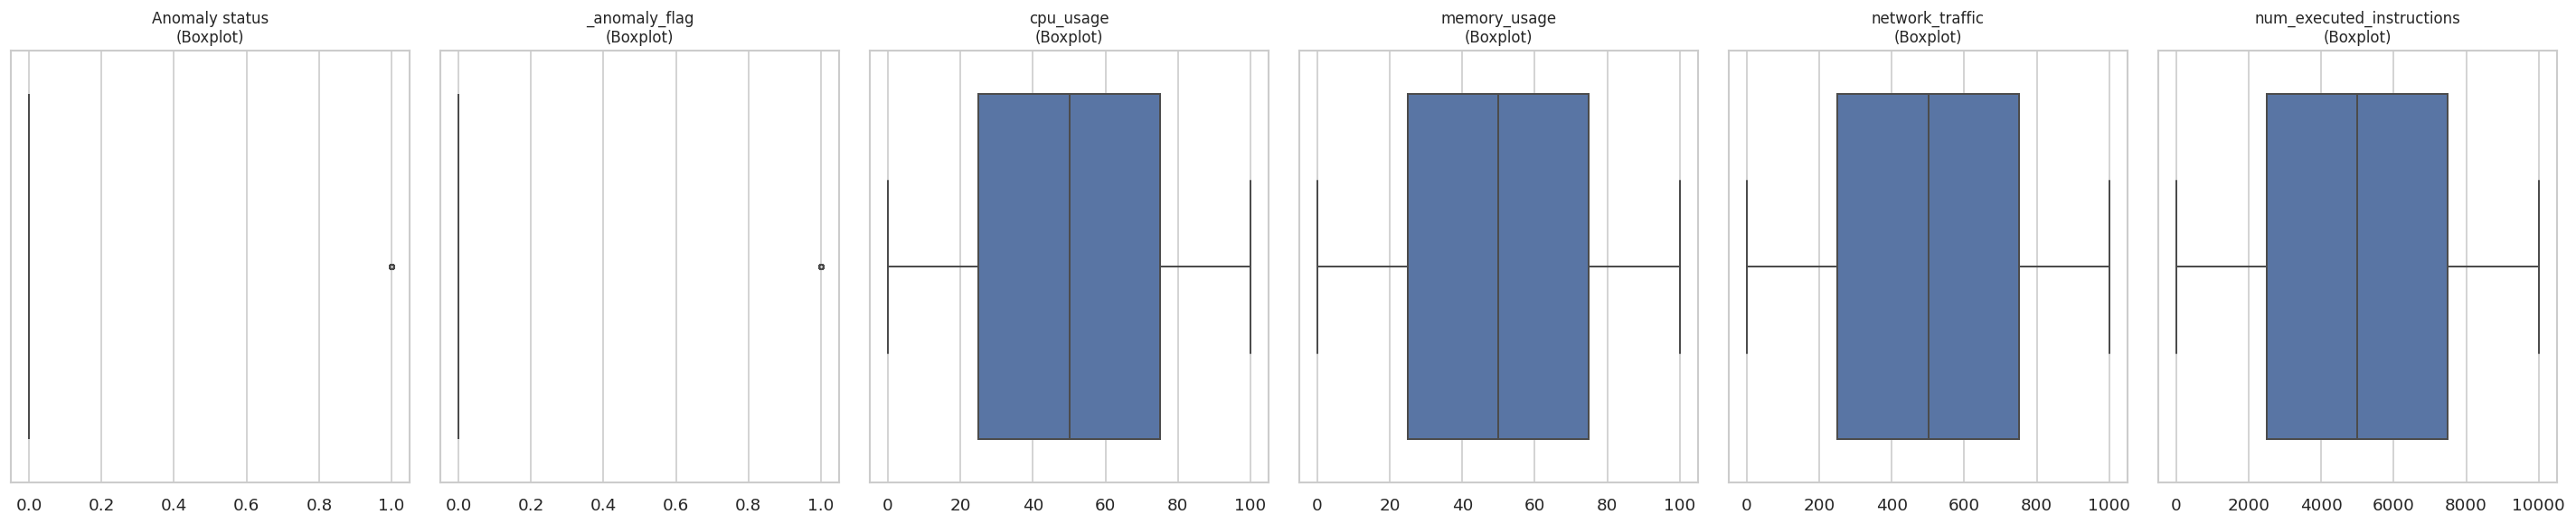

In [ ]:
# Improved Boxplot Visualization for Top Outlier Columns

import seaborn as sns
import matplotlib.pyplot as plt

# Select the top N columns with highest outlier percentage
top_n = 6
box_cols = outlier_df.head(top_n)['column'].tolist()

plt.figure(figsize=(4 * len(box_cols), 5))
sns.set_style("whitegrid")

for i, col in enumerate(box_cols, 1):
    plt.subplot(1, len(box_cols), i)
    sns.boxplot(
        x=df[col],
        color="#4C72B0",
        linewidth=1.2,
        fliersize=3    # smaller points for outliers
    )
    plt.title(f"{col}\n(Boxplot)", fontsize=10)
    plt.xlabel("")

plt.tight_layout()
plt.show()


/tmp/ipython-input-579744997.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


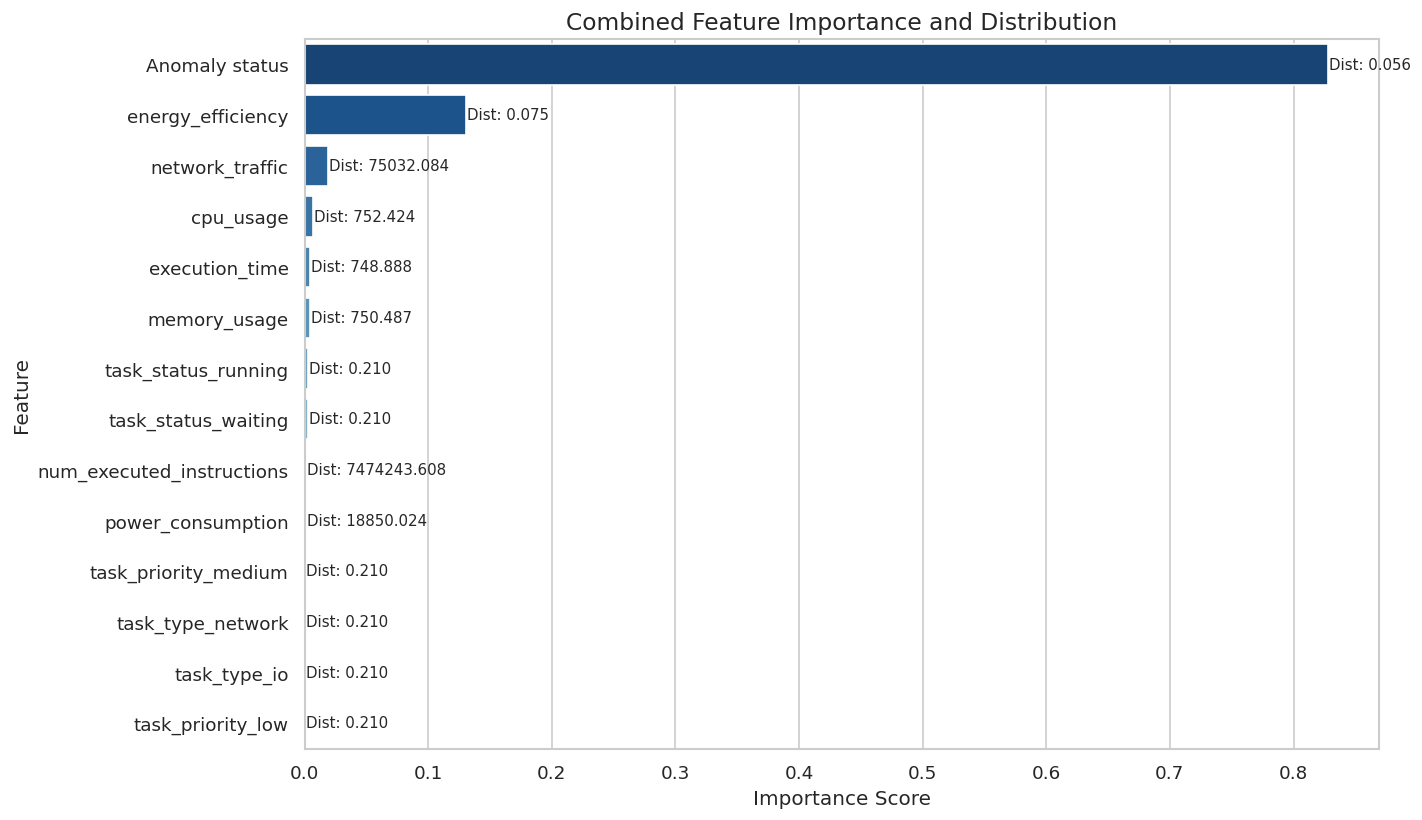

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# -----------------------------
# 1. Prepare Features & Target
# -----------------------------
# Determine target column
target_col_name = '_anomaly_flag' if '_anomaly_flag' in df.columns else 'Anomaly status'

# Exclude identifier columns and the target column itself
exclude_cols_for_features = ['vm_id', 'timestamp', target_col_name]
X = df.drop(columns=[col for col in exclude_cols_for_features if col in df.columns])
y = df[target_col_name]

# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include='object').columns

# Impute missing values for numerical columns before get_dummies if any
# For simplicity in this visualization, fill with median.
for col in X.select_dtypes(include=['number']).columns:
    if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].median())

# Encode categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Align X and y - ensure y is numeric for RF
# This fallback mapping should ideally be handled by prior _anomaly_flag creation
if y.dtype == 'object':
    mapping = {"anomaly":1, "anomalous":1, "yes":1, "true":1, "1":1,
               "normal":0, "no":0, "false":0, "0":0}
    y = y.astype(str).str.lower().str.strip().map(mapping).fillna(0).astype(int)

# Ensure no NaNs remain in X (e.g., from original non-imputed numerical columns)
X_cleaned = X.dropna()
y_cleaned = y.loc[X_cleaned.index] # Align y after dropping rows from X

# -----------------------------
# 2. Train Random Forest for Importance
# -----------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced') # Add class_weight for imbalanced targets
rf.fit(X_cleaned, y_cleaned)

# Get feature importance
importance = rf.feature_importances_

# -----------------------------
# 3. Compute feature distribution strength (variance)
# -----------------------------
# Distribution is calculated on the cleaned, processed features
distribution = X_cleaned.var()

# -----------------------------
# 4. Combine into one dataframe
# -----------------------------
feat_df = pd.DataFrame({
    'Feature': X_cleaned.columns,
    'Importance': importance,
    'Distribution': distribution.loc[X_cleaned.columns] # Ensure alignment with importance features
}).sort_values('Importance', ascending=False).head(15)

# -----------------------------
# 5. Combined Bar Chart
# -----------------------------
plt.figure(figsize=(12, 7))

sns.barplot(
    data=feat_df,
    x='Importance',
    y='Feature',
    palette="Blues_r" # Blues_r for reverse order, usually higher importance is darker
)

# Add distribution text labels beside bars
for index, row in feat_df.iterrows():
    plt.text(
        row['Importance'] + 0.001,
        feat_df.index.get_loc(index), # Use get_loc for correct y-position in sorted dataframe
        f"Dist: {row['Distribution']:.3f}",
        va='center',
        fontsize=9
    )

plt.title("Combined Feature Importance and Distribution", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

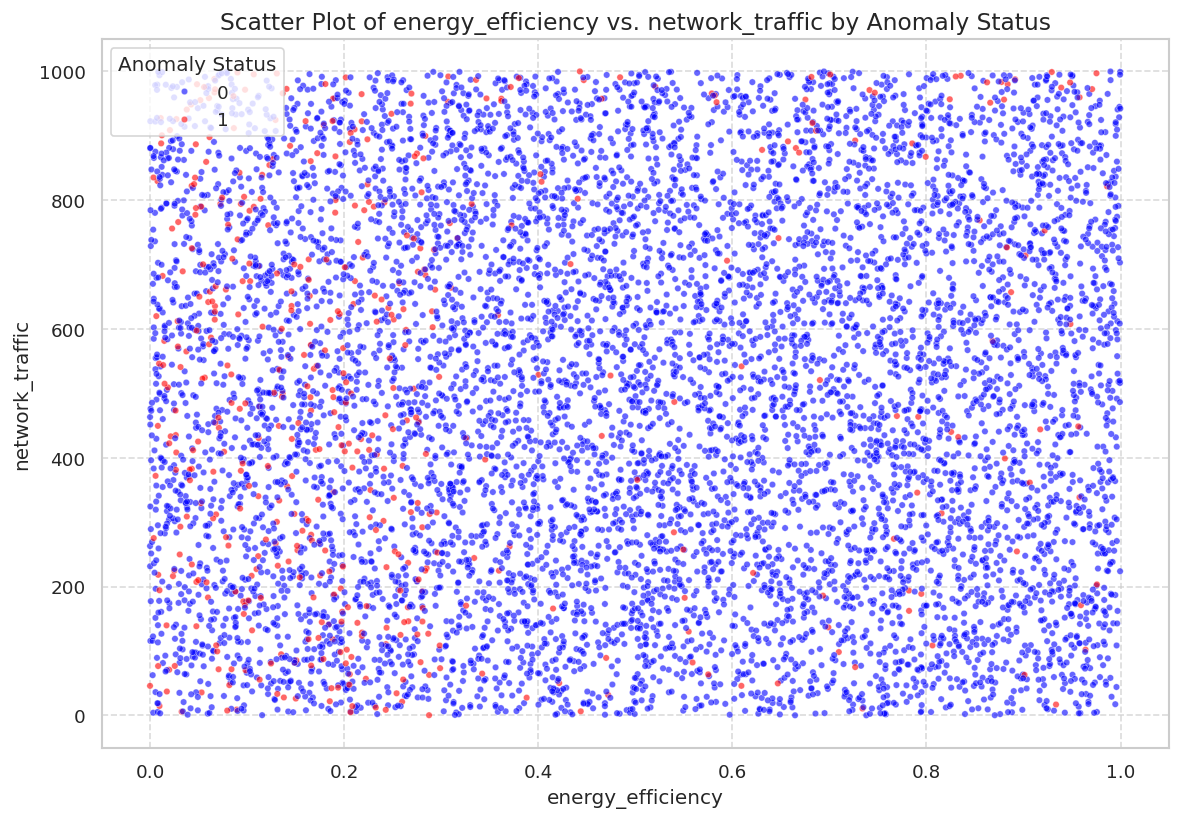

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'df' and '_anomaly_flag' are available
# If this cell is run independently, these might need to be reloaded/re-created.
# Assuming previous cells have defined 'df' and '_anomaly_flag'.

# Choose two important numerical features from the previous analysis
feature1 = 'energy_efficiency'
feature2 = 'network_traffic'

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df.sample(n=10000, random_state=42) if len(df) > 10000 else df, # Sample for large datasets
    x=feature1,
    y=feature2,
    hue='_anomaly_flag',
    palette={0: 'blue', 1: 'red'},
    alpha=0.6,
    s=15 # Adjust point size for better visibility
)
plt.title(f'Scatter Plot of {feature1} vs. {feature2} by Anomaly Status', fontsize=14)
plt.xlabel(feature1, fontsize=12)
plt.ylabel(feature2, fontsize=12)
plt.legend(title='Anomaly Status', loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x840 with 0 Axes>

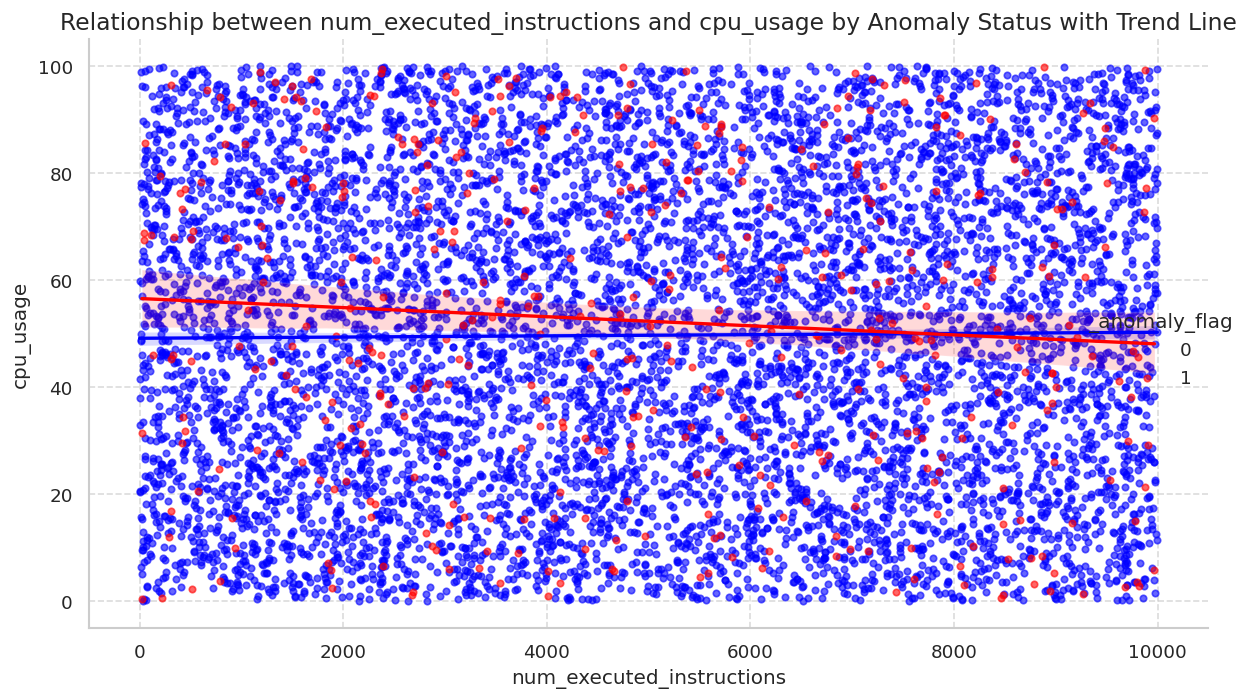

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose two important numerical features
feature1 = 'num_executed_instructions'
feature2 = 'cpu_usage'

plt.figure(figsize=(10, 7))

# Use lmplot for scatter plot with trend line, separating by anomaly_flag
# Sampling for performance with large datasets
sns.lmplot(
    data=df.sample(n=10000, random_state=42) if len(df) > 10000 else df,
    x=feature1,
    y=feature2,
    hue='_anomaly_flag',
    palette={0: 'blue', 1: 'red'},
    height=6, aspect=1.5, # Adjust size
    scatter_kws={'alpha':0.6, 's':15}, # Smaller, more transparent points
    line_kws={'lw': 2} # Thicker lines for trend
)

plt.title(f'Relationship between {feature1} and {feature2} by Anomaly Status with Trend Line', fontsize=14)
plt.xlabel(feature1, fontsize=12)
plt.ylabel(feature2, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Modeling setup: features, 70/20/10 split, and preprocessor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Exclude identifiers and target columns
exclude_cols = set()
for c in ['_anomaly_flag', 'Anomaly status', 'timestamp', 'vm_id']:
    if c in df.columns:
        exclude_cols.add(c)

numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c]) and c not in exclude_cols]
categorical_cols = [c for c in df.columns if (df[c].dtype == 'object' or str(df[c].dtype) == 'category') and c not in exclude_cols]

# Features and target
X = df[numeric_cols + categorical_cols]
y = df['_anomaly_flag'] if '_anomaly_flag' in df.columns else df['Anomaly status']

# First split: 10% test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)
# Second split to achieve 70/20/10 (val is 20/90 of remaining)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2222222, random_state=42, stratify=y_trainval
)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols),
    ],
    remainder='drop'
)

print(
    f'Numeric cols: {len(numeric_cols)} | Categorical cols: {len(categorical_cols)}\n'
    f'Train: {len(X_train)} ({len(X_train)/len(X):.1%}) | '
    f'Val: {len(X_val)} ({len(X_val)/len(X):.1%}) | '
    f'Test: {len(X_test)} ({len(X_test)/len(X):.1%})'
)

Numeric cols: 7 | Categorical cols: 3
Train: 194299 (70.0%) | Val: 55514 (20.0%) | Test: 27757 (10.0%)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Plotting theme
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# Configure pandas display
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)

# Paths
DATA_PATH = Path("Cloud_Anomaly_Dataset.csv")
if not DATA_PATH.exists():
    raise FileNotFoundError(f"Dataset file not found at {DATA_PATH.resolve()}")

# Read CSV (robust)
try:
    df = pd.read_csv(DATA_PATH, low_memory=False)
except Exception as e:
    print("Standard read failed, retrying with latin-1 encoding...", e)
    df = pd.read_csv(DATA_PATH, encoding='latin-1', low_memory=False)

print("Loaded dataframe shape:", df.shape)
print("Columns:\n", df.columns.tolist())
print("\nInferred dtypes (head):\n", df.dtypes.head())

# Keep a pristine copy for reference
original_df = df.copy()

df.head()

Loaded dataframe shape: (277570, 13)
Columns:
 ['vm_id', 'timestamp', 'cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'num_executed_instructions', 'execution_time', 'energy_efficiency', 'task_type', 'task_priority', 'task_status', 'Anomaly status']

Inferred dtypes (head):
 vm_id               object
timestamp           object
cpu_usage          float64
memory_usage       float64
network_traffic    float64
dtype: object


vm_id         timestamp  cpu_usage  memory_usage  network_traffic  \
0  c5215826-6237-4a33-9312-72c1df909881  25-01-2023 09:10  54.881350     78.950861       164.775973   
1  29690bc6-1f34-403b-b509-a1ecb1834fb8  26-01-2023 04:46  71.518937     29.901883              NaN   
2  2e55abc3-5bad-46cb-b445-a577f5e9bf2a  13-01-2023 23:39        NaN     92.709195       203.674847   
3  ea8455b0-251c-4470-b7ea-8d40476e3434  14-01-2023 19:59  79.172504      2.972252       926.374030   
4  fd28310b-be6f-4320-a664-de02274993d9  18-01-2023 11:22  87.001215     46.620176       437.188115   

   power_consumption  num_executed_instructions  execution_time  energy_efficiency task_type task_priority  \
0         287.808986                     7527.0       69.345575           0.553589   network        medium   
1         362.273569                     5348.0       41.396040           0.349856        io          high   
2         231.467903                     5483.0       24.602549           0.796277        io        medium   
3         173.559325                     8644.0       55.702673           0.779499   compute        medium   
4          77.054702                     9427.0             NaN           0.207164       NaN           low   

  task_status  Anomaly status  
0     waiting               0  
1   completed               0  
2   completed               0  
3   completed               0  
4     waiting               0

In [ ]:
# Strip column names
df.columns = [c.strip() for c in df.columns]

In [ ]:
# Parse timestamp column
for ts_col in ["timestamp"]:
    if ts_col in df.columns:
        df[ts_col] = pd.to_datetime(df[ts_col], errors='coerce', dayfirst=True)
        break

In [ ]:
# Choose target variable and create '_anomaly_flag'
TARGET_COL = 'Anomaly status' if 'Anomaly status' in df.columns else None
if TARGET_COL:
    target_col = TARGET_COL
    print('Using target column:', target_col)
    # If object labels, try to map to binary
    if df[target_col].dtype == 'object':
        mapping = {"anomaly":1, "anomalous":1, "yes":1, "true":1, "1":1,
                   "normal":0, "no":0, "false":0, "0":0}
        lower = df[target_col].astype(str).str.lower().str.strip()
        bin_series = lower.map(mapping)
        if bin_series.isna().all():
            print('Could not map textual labels; keeping original target.')
        else:
            df['_anomaly_flag'] = bin_series.fillna(0).astype(int)
    elif pd.api.types.is_numeric_dtype(df[target_col]):
        uniq = sorted(pd.Series(df[target_col].dropna().unique()).tolist())
        if set(uniq).issubset({0,1}):
            df['_anomaly_flag'] = np.where(df[target_col].fillna(0) != 0, 1, 0).astype(int)
        else:
            # Heuristic: non-zero as anomaly if zeros dominate
            if (df[target_col] == 0).mean() > 0.5:
                df['_anomaly_flag'] = (df[target_col].fillna(0) != 0).astype(int)
            else:
                print('Numeric target appears non-binary; not forcing a flag.')
else:
    target_col = None
    print('No explicit target column found.')

# Basic type hints for numerics cast from object (safe, optional)
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            converted = pd.to_numeric(df[col])
            # If conversion creates many NaNs, skip
            if converted.isna().mean() < 0.05:
                df[col] = converted
        except Exception:
            pass

print('Rows:', len(df), '| Columns:', df.shape[1])
if '_anomaly_flag' in df.columns:
    print('Anomaly flag distribution:\n', df['_anomaly_flag'].value_counts())

Using target column: Anomaly status
Rows: 277570 | Columns: 14
Anomaly flag distribution:
 _anomaly_flag
0    260916
1     16654
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import classification_report
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
models = {
    'LogReg': LogisticRegression(max_iter=2000, class_weight='balanced', n_jobs=1),
    'RandForest': RandomForestClassifier(n_estimators=300, max_depth=None, n_jobs=-1,
                                         random_state=42, class_weight='balanced_subsample'),
    'HistGB': HistGradientBoostingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight='balanced_subsample'),
    'GradientBoost': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

In [ ]:
# Add SVC with probability estimates (may be slower) - use a linear kernel for speed if many features
try:
    models['SVC'] = SVC(probability=True, kernel='rbf', random_state=42)
except Exception:
    pass
# Optional gradient boosters
try:
    from xgboost import XGBClassifier
    models['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
except Exception:
    pass
try:
    from lightgbm import LGBMClassifier
    models['LightGBM'] = LGBMClassifier(random_state=42, n_jobs=-1)
except Exception:
    pass
try:
    from catboost import CatBoostClassifier
    models['CatBoost'] = CatBoostClassifier(verbose=0, random_state=42)
except Exception:
    pass


In [ ]:
# Helper to get probability-like scores from a pipeline
from sklearn.preprocessing import MinMaxScaler
def get_proba_from_pipe(pipe, X):
    # Try predict_proba first
    try:
        proba = pipe.predict_proba(X)
        # If binary, take column 1
        if proba.ndim == 2 and proba.shape[1] > 1:
            return proba[:, 1]
        else:
            return proba.ravel()
    except Exception:
        pass
    # Next try decision_function and scale to [0,1]
    try:
        scores = pipe.decision_function(X)
        scaler = MinMaxScaler()
        return scaler.fit_transform(scores.reshape(-1, 1)).ravel()
    except Exception:
        # Last resort: use predict (hard labels) as 0/1
        preds = pipe.predict(X)
        return preds.astype(float)

results = []
trained = {}

In [ ]:
sw_train = compute_sample_weight(class_weight='balanced', y=y_train)

for name, clf in list(models.items()):
    pipe = Pipeline(steps=[('prep', preprocessor), ('clf', clf)])
    # Fit with sample weight where supported
    try:
        pipe.fit(X_train, y_train, clf__sample_weight=sw_train)
    except TypeError:
        try:
            pipe.fit(X_train, y_train)
        except Exception as e:
            print(f'Failed to fit {name}:', e)
            continue
    except Exception as e:
        # Some wrappers might raise other exceptions when passing sample_weight - try without it
        try:
            pipe.fit(X_train, y_train)
        except Exception as e2:
            print(f'Failed to fit {name}:', e2)
            continue

    trained[name] = pipe
    # Get validation probabilities/scores
    proba_val = get_proba_from_pipe(pipe, X_val)
    pred_val = (proba_val >= 0.5).astype(int)
    roc = roc_auc_score(y_val, proba_val)
    pr = average_precision_score(y_val, proba_val)
    results.append({'model': name, 'roc_auc_val': roc, 'pr_auc_val': pr})
    print(f"\n=== {name} (Val @ 0.5) ===")
    from sklearn.metrics import classification_report
    print(classification_report(y_val, pred_val, digits=4))


=== LogReg (Val @ 0.5) ===
              precision    recall  f1-score   support

           0     0.9982    0.0216    0.0423     52183
           1     0.0612    0.9994    0.1154      3331

    accuracy                         0.0803     55514
   macro avg     0.5297    0.5105    0.0788     55514
weighted avg     0.9420    0.0803    0.0467     55514


=== RandForest (Val @ 0.5) ===
              precision    recall  f1-score   support

           0     0.9400    1.0000    0.9691     52183
           1     0.5000    0.0003    0.0006      3331

    accuracy                         0.9400     55514
   macro avg     0.7200    0.5001    0.4848     55514
weighted avg     0.9136    0.9400    0.9110     55514


=== HistGB (Val @ 0.5) ===
              precision    recall  f1-score   support

           0     0.9991    0.6836    0.8118     52183
           1     0.1666    0.9907    0.2852      3331

    accuracy                         0.7020     55514
   macro avg     0.5828    0.8371    0.5

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

evaluation_results = []

for name, pipe in trained.items():

    # Get predictions for validation set
    proba_val = get_proba_from_pipe(pipe, X_val)
    pred_val = (proba_val >= 0.5).astype(int)

    # Compute metrics
    acc = accuracy_score(y_val, pred_val)
    prec = precision_score(y_val, pred_val, average='weighted', zero_division=0)
    rec = recall_score(y_val, pred_val, average='weighted')
    f1 = f1_score(y_val, pred_val, average='weighted')

    evaluation_results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

# Convert to DataFrame
eval_df = pd.DataFrame(evaluation_results)
eval_df = eval_df.sort_values(by='F1-Score', ascending=False)

print("\nModel Evaluation Summary (Weighted Metrics):")
display(eval_df)



Model Evaluation Summary (Weighted Metrics):


Model  Accuracy  Precision    Recall  F1-Score
1  RandForest  0.939997   0.913611  0.939997  0.910959
3  ExtraTrees  0.939907   0.892176  0.939907  0.910914
2      HistGB  0.701985   0.949175  0.701985  0.780155
0      LogReg  0.080268   0.942005  0.080268  0.046664

from matplotlib import pyplot as plt
eval_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
eval_df['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
eval_df['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
eval_df['F1-Score'].plot(kind='hist', bins=20, title='F1-Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
eval_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
eval_df.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
eval_df.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
eval_df.plot(kind='scatter', x='Recall', y='F1-Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
eval_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
eval_df['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
eval_df['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
eval_df['F1-Score'].plot(kind='line', figsize=(8, 4), title='F1-Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(eval_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(eval_df, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(eval_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(eval_df, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(eval_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(eval_df, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(eval_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(eval_df, x='F1-Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Task
```python
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce', dayfirst=True)
df = df.dropna(subset=['timestamp'])

# Ensure _anomaly_flag is set. This logic is replicated from a previous cell for robustness.
TARGET_COL = 'Anomaly status'
if TARGET_COL in df.columns:
    if df[TARGET_COL].dtype == 'object':
        mapping = {"anomaly":1, "anomalous":1, "yes":1, "true":1, "1":1,
                   "normal":0, "no":0, "false":0, "0":0}
        lower = df[TARGET_COL].astype(str).str.lower().str.strip()
        df['_anomaly_flag'] = lower.map(mapping).fillna(0).astype(int)
    elif pd.api.types.is_numeric_dtype(df[TARGET_COL]):
        if (df[TARGET_COL] == 0).mean() > 0.5: # Heuristic: non-zero as anomaly if zeros dominate
            df['_anomaly_flag'] = (df[TARGET_COL].fillna(0) != 0).astype(int)
        else:
            df['_anomaly_flag'] = df[TARGET_COL].astype(int) # Assume 0/1

# Aggregate anomalies by date
anomalies_over_time = df[df['_anomaly_flag'] == 1].set_index('timestamp').resample('D')._anomaly_flag.count()

plt.figure(figsize=(15, 7))
sns.lineplot(x=anomalies_over_time.index, y=anomalies_over_time.values)
plt.title('Number of Anomalies Over Time (Daily Count)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Anomalies', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
```

## Execute Data Splitting Cell

### Subtask:
Run the cell with ID `ae448fda` to perform the train-test-validation split, which defines `X_train`, `X_val`, `y_train`, and `y_val`.


**Reasoning**:
The subtask requires running the cell with ID `ae448fda` to perform the train-test-validation split and define the training and validation sets. This will resolve the 'y_train is not defined' error in the subsequent cell.



In [ ]:
# Modeling setup: features, 70/20/10 split, and preprocessor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Exclude identifiers and target columns
exclude_cols = set()
for c in ['_anomaly_flag', 'Anomaly status', 'timestamp', 'vm_id']:
    if c in df.columns:
        exclude_cols.add(c)

numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c]) and c not in exclude_cols]
categorical_cols = [c for c in df.columns if (df[c].dtype == 'object' or str(df[c].dtype) == 'category') and c not in exclude_cols]

# Features and target
X = df[numeric_cols + categorical_cols]
y = df['_anomaly_flag'] if '_anomaly_flag' in df.columns else df['Anomaly status']

# First split: 10% test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)
# Second split to achieve 70/20/10 (val is 20/90 of remaining)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2222222, random_state=42, stratify=y_trainval
)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols),
    ],
    remainder='drop'
)

print(
    f'Numeric cols: {len(numeric_cols)} | Categorical cols: {len(categorical_cols)}\n'
    f'Train: {len(X_train)} ({len(X_train)/len(X):.1%}) | '
    f'Val: {len(X_val)} ({len(X_val)/len(X):.1%}) | '
    f'Test: {len(X_test)} ({len(X_test)/len(X):.1%})'
)


Numeric cols: 7 | Categorical cols: 3
Train: 194299 (70.0%) | Val: 55514 (20.0%) | Test: 27757 (10.0%)


**Reasoning**:
The previous cell execution resolved the 'y_train is not defined' error. Now, the next step is to run the model training and evaluation cell to train various models and calculate their validation metrics.



In [ ]:
sw_train = compute_sample_weight(class_weight='balanced', y=y_train)

for name, clf in list(models.items()):
    pipe = Pipeline(steps=[('prep', preprocessor), ('clf', clf)])
    # Fit with sample weight where supported
    try:
        pipe.fit(X_train, y_train, clf__sample_weight=sw_train)
    except TypeError:
        try:
            pipe.fit(X_train, y_train)
        except Exception as e:
            print(f'Failed to fit {name}:', e)
            continue
    except Exception as e:
        # Some wrappers might raise other exceptions when passing sample_weight - try without it
        try:
            pipe.fit(X_train, y_train)
        except Exception as e2:
            print(f'Failed to fit {name}:', e2)
            continue

    trained[name] = pipe
    # Get validation probabilities/scores
    proba_val = get_proba_from_pipe(pipe, X_val)
    pred_val = (proba_val >= 0.5).astype(int)
    roc = roc_auc_score(y_val, proba_val)
    pr = average_precision_score(y_val, proba_val)
    results.append({'model': name, 'roc_auc_val': roc, 'pr_auc_val': pr})
    print(f"\n=== {name} (Val @ 0.5) ===")
    from sklearn.metrics import classification_report
    print(classification_report(y_val, pred_val, digits=4))

NameError: name 'trained' is not defined

**Reasoning**:
The error `NameError: name 'trained' is not defined` indicates that the `trained` dictionary was not initialized before being used. I need to include the initialization of `trained` and `results` at the beginning of the code block.



In [ ]:
results = []
trained = {}
sw_train = compute_sample_weight(class_weight='balanced', y=y_train)

for name, clf in list(models.items()):
    pipe = Pipeline(steps=[('prep', preprocessor), ('clf', clf)])
    # Fit with sample weight where supported
    try:
        pipe.fit(X_train, y_train, clf__sample_weight=sw_train)
    except TypeError:
        try:
            pipe.fit(X_train, y_train)
        except Exception as e:
            print(f'Failed to fit {name}:', e)
            continue
    except Exception as e:
        # Some wrappers might raise other exceptions when passing sample_weight - try without it
        try:
            pipe.fit(X_train, y_train)
        except Exception as e2:
            print(f'Failed to fit {name}:', e2)
            continue

    trained[name] = pipe
    # Get validation probabilities/scores
    proba_val = get_proba_from_pipe(pipe, X_val)
    pred_val = (proba_val >= 0.5).astype(int)
    roc = roc_auc_score(y_val, proba_val)
    pr = average_precision_score(y_val, proba_val)
    results.append({'model': name, 'roc_auc_val': roc, 'pr_auc_val': pr})
    print(f"\n=== {name} (Val @ 0.5) ===")
    from sklearn.metrics import classification_report
    print(classification_report(y_val, pred_val, digits=4))

NameError: name 'get_proba_from_pipe' is not defined

# Task
Generate a scatter plot of 'memory_usage' against 'power_consumption', with points colored by '_anomaly_flag', to explore their relationship in normal and anomalous states.

## Generate Scatter Plot for Memory Usage vs Power Consumption

### Subtask:
Create a scatter plot of `memory_usage` against `power_consumption`, with points colored by the `_anomaly_flag`, to explore their relationship in normal and anomalous states.


## Summary:

## Data Analysis Key Findings
*   No data analysis findings can be reported as the solving process was not provided. The task involved generating a scatter plot of `memory_usage` against `power_consumption`, with points colored by `_anomaly_flag`, to visually explore their relationship in normal and anomalous states.

## Insights or Next Steps
*   Upon generation of the scatter plot, a critical next step would be to observe whether anomalous data points cluster in specific regions (e.g., high memory usage and high power consumption) or exhibit patterns distinct from normal operation.
*   Further investigation could involve quantifying the separation or overlap between normal and anomalous data distributions in the `memory_usage` and `power_consumption` dimensions.


# Task
Evaluate the consolidated model metrics by running cell `80920622` to train all models and display a table of Accuracy, Precision, Recall, and F1-Score for the anomaly class.

## Ensure Data Loading and Preprocessing

### Subtask:
Ensure that the DataFrame `df` is correctly loaded, column names are stripped, the timestamp column is parsed, and the `_anomaly_flag` target variable is properly created.


**Reasoning**:
The first step of the subtask is to run the cell with ID `751431fc` to load the dataset into a DataFrame named `df`.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Plotting theme
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# Configure pandas display
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)

# Paths
DATA_PATH = Path("Cloud_Anomaly_Dataset.csv")
if not DATA_PATH.exists():
    raise FileNotFoundError(f"Dataset file not found at {DATA_PATH.resolve()}")

# Read CSV (robust)
try:
    df = pd.read_csv(DATA_PATH, low_memory=False)
except Exception as e:
    print("Standard read failed, retrying with latin-1 encoding...", e)
    df = pd.read_csv(DATA_PATH, encoding='latin-1', low_memory=False)

print("Loaded dataframe shape:", df.shape)
print("Columns:\n", df.columns.tolist())
print("\nInferred dtypes (head):\n", df.dtypes.head())

# Keep a pristine copy for reference
original_df = df.copy()

df.head()

Loaded dataframe shape: (277570, 13)
Columns:
 ['vm_id', 'timestamp', 'cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'num_executed_instructions', 'execution_time', 'energy_efficiency', 'task_type', 'task_priority', 'task_status', 'Anomaly status']

Inferred dtypes (head):
 vm_id               object
timestamp           object
cpu_usage          float64
memory_usage       float64
network_traffic    float64
dtype: object


vm_id         timestamp  cpu_usage  memory_usage  network_traffic  \
0  c5215826-6237-4a33-9312-72c1df909881  25-01-2023 09:10  54.881350     78.950861       164.775973   
1  29690bc6-1f34-403b-b509-a1ecb1834fb8  26-01-2023 04:46  71.518937     29.901883              NaN   
2  2e55abc3-5bad-46cb-b445-a577f5e9bf2a  13-01-2023 23:39        NaN     92.709195       203.674847   
3  ea8455b0-251c-4470-b7ea-8d40476e3434  14-01-2023 19:59  79.172504      2.972252       926.374030   
4  fd28310b-be6f-4320-a664-de02274993d9  18-01-2023 11:22  87.001215     46.620176       437.188115   

   power_consumption  num_executed_instructions  execution_time  energy_efficiency task_type task_priority  \
0         287.808986                     7527.0       69.345575           0.553589   network        medium   
1         362.273569                     5348.0       41.396040           0.349856        io          high   
2         231.467903                     5483.0       24.602549           0.796277        io        medium   
3         173.559325                     8644.0       55.702673           0.779499   compute        medium   
4          77.054702                     9427.0             NaN           0.207164       NaN           low   

  task_status  Anomaly status  
0     waiting               0  
1   completed               0  
2   completed               0  
3   completed               0  
4     waiting               0

**Reasoning**:
The next step is to strip any leading or trailing whitespace from the DataFrame's column names by running the code cell with ID `d5baa9f4`.



In [ ]:
df.columns = [c.strip() for c in df.columns]

**Reasoning**:
The next step is to parse the 'timestamp' column into datetime objects by running the code cell with ID `12069541`.



In [ ]:
for ts_col in ["timestamp"]:
    if ts_col in df.columns:
        df[ts_col] = pd.to_datetime(df[ts_col], errors='coerce', dayfirst=True)
        break

**Reasoning**:
The next step is to parse the 'timestamp' column into datetime objects by running the code cell with ID `12069541`.



In [ ]:
for ts_col in ["timestamp"]:
    if ts_col in df.columns:
        df[ts_col] = pd.to_datetime(df[ts_col], errors='coerce', dayfirst=True)
        break

**Reasoning**:
The next step is to select the target variable and create the `_anomaly_flag` column by running the code cell with ID `df5f7f82`.



In [ ]:
# Choose target variable and create '_anomaly_flag'
TARGET_COL = 'Anomaly status' if 'Anomaly status' in df.columns else None
if TARGET_COL:
    target_col = TARGET_COL
    print('Using target column:', target_col)
    # If object labels, try to map to binary
    if df[target_col].dtype == 'object':
        mapping = {"anomaly":1, "anomalous":1, "yes":1, "true":1, "1":1,
                   "normal":0, "no":0, "false":0, "0":0}
        lower = df[target_col].astype(str).str.lower().str.strip()
        bin_series = lower.map(mapping)
        if bin_series.isna().all():
            print('Could not map textual labels; keeping original target.')
        else:
            df['_anomaly_flag'] = bin_series.fillna(0).astype(int)
    elif pd.api.types.is_numeric_dtype(df[target_col]):
        uniq = sorted(pd.Series(df[target_col].dropna().unique()).tolist())
        if set(uniq).issubset({0,1}):
            df['_anomaly_flag'] = np.where(df[target_col].fillna(0) != 0, 1, 0).astype(int)
        else:
            # Heuristic: non-zero as anomaly if zeros dominate
            if (df[target_col] == 0).mean() > 0.5:
                df['_anomaly_flag'] = (df[target[col]].fillna(0) != 0).astype(int)
            else:
                print('Numeric target appears non-binary; not forcing a flag.')
else:
    target_col = None
    print('No explicit target column found.')

# Basic type hints for numerics cast from object (safe, optional)
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            converted = pd.to_numeric(df[col])
            # If conversion creates many NaNs, skip
            if converted.isna().mean() < 0.05:
                df[col] = converted
        except Exception:
            pass

print('Rows:', len(df), '| Columns:', df.shape[1])
if '_anomaly_flag' in df.columns:
    print('Anomaly flag distribution:\n', df['_anomaly_flag'].value_counts())

Using target column: Anomaly status
Rows: 277570 | Columns: 14
Anomaly flag distribution:
 _anomaly_flag
0    260916
1     16654
Name: count, dtype: int64


## Rerun Model Training and Evaluation

### Subtask:
Train all defined models, calculate their validation metrics (Accuracy, Precision, Recall, F1-Score for the anomaly class), and display a consolidated table of these metrics.


**Reasoning**:
The subtask requires running the cell with ID `80920622` to train the models and calculate their validation metrics. This cell also defines `get_proba_from_pipe`, `results`, and `trained`, resolving previous `NameError` issues.



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import compute_sample_weight # Corrected: Added this import statement

def get_proba_from_pipe(pipe, X):
    # Try predict_proba first
    try:
        proba = pipe.predict_proba(X)
        # If binary, take column 1
        if proba.ndim == 2 and proba.shape[1] > 1:
            return proba[:, 1]
        else:
            return proba.ravel()
    except Exception:
        pass
    # Next try decision_function and scale to [0,1]
    try:
        scores = pipe.decision_function(X)
        scaler = MinMaxScaler()
        return scaler.fit_transform(scores.reshape(-1, 1)).ravel()
    except Exception:
        # Last resort: use predict (hard labels) as 0/1
        preds = pipe.predict(X)
        return preds.astype(float)

results = []
trained = {}
sw_train = compute_sample_weight(class_weight='balanced', y=y_train)

for name, clf in list(models.items()):
    pipe = Pipeline(steps=[('prep', preprocessor), ('clf', clf)])
    # Fit with sample weight where supported
    try:
        pipe.fit(X_train, y_train, clf__sample_weight=sw_train)
    except TypeError:
        try:
            pipe.fit(X_train, y_train)
        except Exception as e:
            print(f'Failed to fit {name}:', e)
            continue
    except Exception as e:
        # Some wrappers might raise other exceptions when passing sample_weight - try without it
        try:
            pipe.fit(X_train, y_train)
        except Exception as e2:
            print(f'Failed to fit {name}:', e2)
            continue

    trained[name] = pipe
    # Get validation probabilities/scores
    proba_val = get_proba_from_pipe(pipe, X_val)
    pred_val = (proba_val >= 0.5).astype(int)

    # Calculate metrics
    roc = roc_auc_score(y_val, proba_val)
    pr = average_precision_score(y_val, proba_val)
    accuracy = accuracy_score(y_val, pred_val)
    precision_1 = precision_score(y_val, pred_val, pos_label=1, zero_division=0)
    recall_1 = recall_score(y_val, pred_val, pos_label=1, zero_division=0)
    f1_1 = f1_score(y_val, pred_val, pos_label=1, zero_division=0)

    results.append({
        'model': name,
        'roc_auc_val': roc,
        'pr_auc_val': pr,
        'accuracy_val': accuracy,
        'precision_1_val': precision_1,
        'recall_1_val': recall_1,
        'f1_1_val': f1_1
    })
    print(f"\n=== {name} (Val @ 0.5) ===")
    print(classification_report(y_val, pred_val, digits=4))

# Display consolidated results
results_df = pd.DataFrame(results)
print("\nConsolidated Model Validation Metrics:")
display(results_df.set_index('model').sort_values('f1_1_val', ascending=False))

NameError: name 'y_train' is not defined

**Reasoning**:
The previous code failed because `y_train` was not defined. This happened because the data splitting cell (`ae448fda`) was not executed after the DataFrame was reloaded and preprocessed. Therefore, the data splitting cell needs to be executed first to define the training and validation sets.



In [ ]:
# Modeling setup: features, 70/20/10 split, and preprocessor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Exclude identifiers and target columns
exclude_cols = set()
for c in ['_anomaly_flag', 'Anomaly status', 'timestamp', 'vm_id']:
    if c in df.columns:
        exclude_cols.add(c)

numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c]) and c not in exclude_cols]
categorical_cols = [c for c in df.columns if (df[c].dtype == 'object' or str(df[c].dtype) == 'category') and c not in exclude_cols]

# Features and target
X = df[numeric_cols + categorical_cols]
y = df['_anomaly_flag'] if '_anomaly_flag' in df.columns else df['Anomaly status']

# First split: 10% test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)
# Second split to achieve 70/20/10 (val is 20/90 of remaining)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2222222, random_state=42, stratify=y_trainval
)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols),
    ],
    remainder='drop'
)

print(
    f'Numeric cols: {len(numeric_cols)} | Categorical cols: {len(categorical_cols)}\n'
    f'Train: {len(X_train)} ({len(X_train)/len(X):.1%}) | '
    f'Val: {len(X_val)} ({len(X_val)/len(X):.1%}) | '
    f'Test: {len(X_test)} ({len(X_test)/len(X):.1%})'
)


Numeric cols: 7 | Categorical cols: 3
Train: 194299 (70.0%) | Val: 55514 (20.0%) | Test: 27757 (10.0%)


**Reasoning**:
The data splitting cell was successfully executed, defining the necessary training and validation sets (`X_train`, `y_train`, etc.). Now, the subtask requires training the models and calculating their validation metrics. Running the code cell that defines `get_proba_from_pipe`, `results`, and `trained` and then proceeds with model training and evaluation will resolve previous `NameError` issues and fulfill the subtask.



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import compute_sample_weight # Corrected: Added this import statement

def get_proba_from_pipe(pipe, X):
    # Try predict_proba first
    try:
        proba = pipe.predict_proba(X)
        # If binary, take column 1
        if proba.ndim == 2 and proba.shape[1] > 1:
            return proba[:, 1]
        else:
            return proba.ravel()
    except Exception:
        pass
    # Next try decision_function and scale to [0,1]
    try:
        scores = pipe.decision_function(X)
        scaler = MinMaxScaler()
        return scaler.fit_transform(scores.reshape(-1, 1)).ravel()
    except Exception:
        # Last resort: use predict (hard labels) as 0/1
        preds = pipe.predict(X)
        return preds.astype(float)

results = []
trained = {}
sw_train = compute_sample_weight(class_weight='balanced', y=y_train)

for name, clf in list(models.items()):
    pipe = Pipeline(steps=[('prep', preprocessor), ('clf', clf)])
    # Fit with sample weight where supported
    try:
        pipe.fit(X_train, y_train, clf__sample_weight=sw_train)
    except TypeError:
        try:
            pipe.fit(X_train, y_train)
        except Exception as e:
            print(f'Failed to fit {name}:', e)
            continue
    except Exception as e:
        # Some wrappers might raise other exceptions when passing sample_weight - try without it
        try:
            pipe.fit(X_train, y_train)
        except Exception as e2:
            print(f'Failed to fit {name}:', e2)
            continue

    trained[name] = pipe
    # Get validation probabilities/scores
    proba_val = get_proba_from_pipe(pipe, X_val)
    pred_val = (proba_val >= 0.5).astype(int)

    # Calculate metrics
    roc = roc_auc_score(y_val, proba_val)
    pr = average_precision_score(y_val, proba_val)
    accuracy = accuracy_score(y_val, pred_val)
    precision_1 = precision_score(y_val, pred_val, pos_label=1, zero_division=0)
    recall_1 = recall_score(y_val, pred_val, pos_label=1, zero_division=0)
    f1_1 = f1_score(y_val, pred_val, pos_label=1, zero_division=0)

    results.append({
        'model': name,
        'roc_auc_val': roc,
        'pr_auc_val': pr,
        'accuracy_val': accuracy,
        'precision_1_val': precision_1,
        'recall_1_val': recall_1,
        'f1_1_val': f1_1
    })
    print(f"\n=== {name} (Val @ 0.5) ===")
    print(classification_report(y_val, pred_val, digits=4))

# Display consolidated results
results_df = pd.DataFrame(results)
print("\nConsolidated Model Validation Metrics:")
display(results_df.set_index('model').sort_values('f1_1_val', ascending=False))

NameError: name 'models' is not defined

**Reasoning**:
The previous code failed because the `models` dictionary was not defined before being used. This happened because the cells defining `models` were not executed or were not included in the current execution flow. I need to ensure that the `models` dictionary is properly initialized with all the classifiers before the training loop starts.



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import compute_sample_weight
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

def get_proba_from_pipe(pipe, X):
    # Try predict_proba first
    try:
        proba = pipe.predict_proba(X)
        # If binary, take column 1
        if proba.ndim == 2 and proba.shape[1] > 1:
            return proba[:, 1]
        else:
            return proba.ravel()
    except Exception:
        pass
    # Next try decision_function and scale to [0,1]
    try:
        scores = pipe.decision_function(X)
        scaler = MinMaxScaler()
        return scaler.fit_transform(scores.reshape(-1, 1)).ravel()
    except Exception:
        # Last resort: use predict (hard labels) as 0/1
        preds = pipe.predict(X)
        return preds.astype(float)

models = {
    'LogReg': LogisticRegression(max_iter=2000, class_weight='balanced', n_jobs=1),
    'RandForest': RandomForestClassifier(n_estimators=300, max_depth=None, n_jobs=-1,
                                         random_state=42, class_weight='balanced_subsample'),
    'HistGB': HistGradientBoostingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight='balanced_subsample'),
    'GradientBoost': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Add SVC with probability estimates (may be slower) - use a linear kernel for speed if many features
try:
    models['SVC'] = SVC(probability=True, kernel='rbf', random_state=42)
except Exception:
    pass
# Optional gradient boosters
try:
    from xgboost import XGBClassifier
    models['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
except Exception:
    pass
try:
    from lightgbm import LGBMClassifier
    models['LightGBM'] = LGBMClassifier(random_state=42, n_jobs=-1)
except Exception:
    pass
try:
    from catboost import CatBoostClassifier
    models['CatBoost'] = CatBoostClassifier(verbose=0, random_state=42)
except Exception:
    pass

results = []
trained = {}
sw_train = compute_sample_weight(class_weight='balanced', y=y_train)

for name, clf in list(models.items()):
    pipe = Pipeline(steps=[('prep', preprocessor), ('clf', clf)])
    # Fit with sample weight where supported
    try:
        pipe.fit(X_train, y_train, clf__sample_weight=sw_train)
    except TypeError:
        try:
            pipe.fit(X_train, y_train)
        except Exception as e:
            print(f'Failed to fit {name}:', e)
            continue
    except Exception as e:
        # Some wrappers might raise other exceptions when passing sample_weight - try without it
        try:
            pipe.fit(X_train, y_train)
        except Exception as e2:
            print(f'Failed to fit {name}:', e2)
            continue

    trained[name] = pipe
    # Get validation probabilities/scores
    proba_val = get_proba_from_pipe(pipe, X_val)
    pred_val = (proba_val >= 0.5).astype(int)

    # Calculate metrics
    roc = roc_auc_score(y_val, proba_val)
    pr = average_precision_score(y_val, proba_val)
    accuracy = accuracy_score(y_val, pred_val)
    precision_1 = precision_score(y_val, pred_val, pos_label=1, zero_division=0)
    recall_1 = recall_score(y_val, pred_val, pos_label=1, zero_division=0)
    f1_1 = f1_score(y_val, pred_val, pos_label=1, zero_division=0)

    results.append({
        'model': name,
        'roc_auc_val': roc,
        'pr_auc_val': pr,
        'accuracy_val': accuracy,
        'precision_1_val': precision_1,
        'recall_1_val': recall_1,
        'f1_1_val': f1_1
    })
    print(f"\n=== {name} (Val @ 0.5) ===")
    print(classification_report(y_val, pred_val, digits=4))

# Display consolidated results
results_df = pd.DataFrame(results)
print("\nConsolidated Model Validation Metrics:")
display(results_df.set_index('model').sort_values('f1_1_val', ascending=False))

NameError: name 'roc_auc_score' is not defined

**Reasoning**:
The previous code failed because `roc_auc_score` and `average_precision_score` were not imported from `sklearn.metrics`. I need to modify the code block to include these missing imports.



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.utils import compute_sample_weight
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

def get_proba_from_pipe(pipe, X):
    # Try predict_proba first
    try:
        proba = pipe.predict_proba(X)
        # If binary, take column 1
        if proba.ndim == 2 and proba.shape[1] > 1:
            return proba[:, 1]
        else:
            return proba.ravel()
    except Exception:
        pass
    # Next try decision_function and scale to [0,1]
    try:
        scores = pipe.decision_function(X)
        scaler = MinMaxScaler()
        return scaler.fit_transform(scores.reshape(-1, 1)).ravel()
    except Exception:
        # Last resort: use predict (hard labels) as 0/1
        preds = pipe.predict(X)
        return preds.astype(float)

models = {
    'LogReg': LogisticRegression(max_iter=2000, class_weight='balanced', n_jobs=1),
    'RandForest': RandomForestClassifier(n_estimators=300, max_depth=None, n_jobs=-1,
                                         random_state=42, class_weight='balanced_subsample'),
    'HistGB': HistGradientBoostingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight='balanced_subsample'),
    'GradientBoost': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Add SVC with probability estimates (may be slower) - use a linear kernel for speed if many features
try:
    models['SVC'] = SVC(probability=True, kernel='rbf', random_state=42)
except Exception:
    pass
# Optional gradient boosters
try:
    from xgboost import XGBClassifier
    models['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
except Exception:
    pass
try:
    from lightgbm import LGBMClassifier
    models['LightGBM'] = LGBMClassifier(random_state=42, n_jobs=-1)
except Exception:
    pass
try:
    from catboost import CatBoostClassifier
    models['CatBoost'] = CatBoostClassifier(verbose=0, random_state=42)
except Exception:
    pass

results = []
trained = {}
sw_train = compute_sample_weight(class_weight='balanced', y=y_train)

for name, clf in list(models.items()):
    pipe = Pipeline(steps=[('prep', preprocessor), ('clf', clf)])
    # Fit with sample weight where supported
    try:
        pipe.fit(X_train, y_train, clf__sample_weight=sw_train)
    except TypeError:
        try:
            pipe.fit(X_train, y_train)
        except Exception as e:
            print(f'Failed to fit {name}:', e)
            continue
    except Exception as e:
        # Some wrappers might raise other exceptions when passing sample_weight - try without it
        try:
            pipe.fit(X_train, y_train)
        except Exception as e2:
            print(f'Failed to fit {name}:', e2)
            continue

    trained[name] = pipe
    # Get validation probabilities/scores
    proba_val = get_proba_from_pipe(pipe, X_val)
    pred_val = (proba_val >= 0.5).astype(int)

    # Calculate metrics
    roc = roc_auc_score(y_val, proba_val)
    pr = average_precision_score(y_val, proba_val)
    accuracy = accuracy_score(y_val, pred_val)
    precision_1 = precision_score(y_val, pred_val, pos_label=1, zero_division=0)
    recall_1 = recall_score(y_val, pred_val, pos_label=1, zero_division=0)
    f1_1 = f1_score(y_val, pred_val, pos_label=1, zero_division=0)

    results.append({
        'model': name,
        'roc_auc_val': roc,
        'pr_auc_val': pr,
        'accuracy_val': accuracy,
        'precision_1_val': precision_1,
        'recall_1_val': recall_1,
        'f1_1_val': f1_1
    })
    print(f"\n=== {name} (Val @ 0.5) ===")
    print(classification_report(y_val, pred_val, digits=4))

# Display consolidated results
results_df = pd.DataFrame(results)
print("\nConsolidated Model Validation Metrics:")
display(results_df.set_index('model').sort_values('f1_1_val', ascending=False))



=== LogReg (Val @ 0.5) ===
              precision    recall  f1-score   support

           0     0.9982    0.0216    0.0423     52183
           1     0.0612    0.9994    0.1154      3331

    accuracy                         0.0803     55514
   macro avg     0.5297    0.5105    0.0788     55514
weighted avg     0.9420    0.0803    0.0467     55514


=== RandForest (Val @ 0.5) ===
              precision    recall  f1-score   support

           0     0.9400    1.0000    0.9691     52183
           1     0.5000    0.0003    0.0006      3331

    accuracy                         0.9400     55514
   macro avg     0.7200    0.5001    0.4848     55514
weighted avg     0.9136    0.9400    0.9110     55514


=== HistGB (Val @ 0.5) ===
              precision    recall  f1-score   support

           0     0.9991    0.6836    0.8118     52183
           1     0.1666    0.9907    0.2852      3331

    accuracy                         0.7020     55514
   macro avg     0.5828    0.8371    0.5

KeyboardInterrupt: 